<a href="https://colab.research.google.com/github/VictorCoelho957/Engenharia-de-controle/blob/main/Tarefa_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Controladores PID - Implementação Matemática e com AMPOP  
**Disciplina**: Engenharia de Controle
**Aluno**: [Victor Coelho da Silva]  
**Professor**: Prof. Marcio Cerqueira  

## Objetivos  
1. Implementar controladores P, I, PI, PD e PID  
2. Simular circuitos com AMPOP (inversor, integrador, diferenciador)  
3. Analisar perturbações e controle ON/OFF com histerese  
4. Comparar desempenho através de métricas (IAE, ITAE, overshoot)  

# Sumário

1. Introdução
2. Definição do Sistema de Segunda Ordem
3. Entradas de Teste e Sinais de Referência
4. Métricas de Desempenho em Controle
5. Análise de Controladores:
   - 5.1 Controlador Proporcional (P)
   - 5.2 Controlador Integral (I)
   - 5.3 Controlador Proporcional-Integral (PI)
   - 5.4 Controlador Proporcional-Derivativo (PD)
   - 5.5 Controlador Proporcional-Integral-Derivativo (PID)
6. Análise Comparativa dos Controladores
7. Otimização de Parâmetros PID com `scipy.optimize`
8. Implementação Física com AMPOP:
   - 8.1 Modelo de Ações Individuais (P, I, D)
   - 8.2 Composição da Saída Total (Vp + Vi + Vd)
   - 8.3 Perturbação na Entrada e Resposta Física
9. Controle ON/OFF com Histerese — Aplicação em Caixa d’Água
10. Conclusão Geral


## Introdução

Nesta tarefa prática, propõe-se a simulação das principais ações de controle estudadas na disciplina — ações **proporcional (P)**, **integral (I)**, **derivativa (D)**, **proporcional-integral (PI)**, **proporcional-derivativa (PD)** e **proporcional-integral-derivativa (PID)** — conforme os conceitos abordados na Aula 8.

A análise contempla não apenas a resposta dos controladores a diferentes tipos de entradas (degrau, rampa, senoidal), mas também sua robustez frente a **perturbações externas**, além da implementação analógica com **amplificadores operacionais (AMPOP)** e a simulação de controle discreto do tipo **ON/OFF com histerese**.

Para atender a essas demandas de forma eficiente, optou-se pela linguagem **Python**, amplamente reconhecida na área de engenharia por sua flexibilidade, legibilidade e vasto ecossistema de bibliotecas científicas. Em particular, destaca-se o uso de:

- `control` para modelagem e simulação de sistemas de controle linear;
- `matplotlib` para visualização gráfica das respostas temporais;
- `scipy` para integração numérica e otimização de parâmetros;
- `pandas` para organização e análise comparativa de métricas;
- `sklearn` para cálculo de erros estatísticos (como RMSE e MSE).

O uso do Python como ferramenta central não só facilita a **reprodutibilidade e análise crítica dos resultados**, como também contribui para o **desenvolvimento de habilidades práticas e técnicas relevantes** para o ambiente profissional da engenharia de controle.

Este estudo, portanto, alia rigor matemático, visualização clara dos fenômenos dinâmicos e uma abordagem computacional moderna, promovendo a integração entre teoria, simulação e interpretação prática dos sistemas.


## Instalação e Importação das Bibliotecas

Para realizar as simulações dos controladores e processar os dados desta tarefa prática, é necessário garantir que todas as bibliotecas essenciais estejam instaladas e corretamente carregadas no ambiente.

As bibliotecas utilizadas foram:

- **NumPy**: operações vetoriais e numéricas de alta performance;
- **Matplotlib**: criação de gráficos e visualizações;
- **SciPy**: integração numérica, sinais e funções científicas;
- **Pandas**: organização e análise tabular de dados (métricas);
- **Control**: modelagem, simulação e análise de sistemas de controle;
- **Scikit-learn**: cálculo de métricas estatísticas (MSE, RMSE etc.);
- **Seaborn** (opcional): estilo visual aprimorado para gráficos;
- **python3-rtimers** (Linux): compatibilidade com bibliotecas de controle.

A seguir, realiza-se a instalação (caso necessário) e a verificação das importações com tratamento de erros.


In [ ]:
pip install numpy matplotlib scikit-learn control pandas scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Instalação das dependências
!pip install numpy matplotlib scipy pandas scikit-learn control
!apt install python3-rtimers  # Necessário para algumas funções de controle no Linux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python3-rtimers


In [ ]:
# Verificação das bibliotecas
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from control import tf, step_response, forced_response, step_info
    import control.matlab as ctrl
    from scipy import signal, integrate
    print("✅ Todas as bibliotecas foram importadas com sucesso!")
except Exception as e:
    print(f"❌ Erro: {str(e)}")


✅ Todas as bibliotecas foram importadas com sucesso!


In [ ]:
import numpy as np                  # Para operações matemáticas
import matplotlib.pyplot as plt     # Para gráficos
from scipy import integrate, signal # Para integração e sinais


In [ ]:
pip install seaborn

## Validação das Bibliotecas

Todas as bibliotecas foram importadas com sucesso, indicando que o ambiente está pronto para realizar as simulações, análises matemáticas, gráficos e otimizações necessárias ao desenvolvimento da tarefa.

Esse conjunto de ferramentas permite uma abordagem **computacional robusta e reprodutível**, essencial para o estudo comparativo dos controladores PID, suas variantes e aplicações físicas com AMPOP.


## Modelo Matemático

### Sistema em Estudo
Planta de 2ª ordem descrita por:

$$
G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

Onde:
- $\omega_n = 2.0\ rad/s$ (frequência natural)
- $\zeta = 0.3$ (coeficiente de amortecimento)

### Métricas de Desempenho
1. **IAE** (Integral do Erro Absoluto):
   $$IAE = \int_{0}^{t} |e(t)| dt$$

2. **ITAE** (Integral do Tempo × Erro Absoluto):
   $$ITAE = \int_{0}^{t} t|e(t)| dt$$

3. **Tempo de Acomodação** ($t_s$): Tempo para permanecer dentro de ±2% do valor final

## Protocolo Experimental

1. **Sinais de Entrada**:
   - Degrau unitário
   - Rampa
   - Senoidal (0.5 Hz)
   - Onda quadrada
   - Degrau com ruído gaussiano ($\sigma=0.1$)

2. **Parâmetros dos Controladores**:


   | Controlador | Kp | Ki | Kd |
   |------------|----|----|----|
   | P          | 5.0 | - | - |
   | PI         | 4.0 | 2.0 | - |
   | PID        | 8.0 | 3.0 | 2.0 |

3. **Critérios de Análise**:
   - Erro em regime permanente
   - Tempo de resposta
   - Robustez frente a perturbações

## Definição do Sistema e Entradas de Teste

Nesta seção, definimos o sistema dinâmico a ser controlado e as diferentes formas de entrada que serão aplicadas para análise das ações de controle.


### Sistema de Segunda Ordem

O sistema a ser analisado é modelado por uma função de transferência de segunda ordem com amortecimento, definida por:

$$
G(s) = \frac{\omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2}
$$

Onde:
- \\( \omega_n = 2.0 \\) rad/s é a frequência natural do sistema;
- \\( \zeta = 0.3 \\) é o coeficiente de amortecimento.

Esse tipo de sistema é comumente utilizado para representar processos dinâmicos com comportamento oscilatório e amortecido, como sistemas massa-mola-amortecedor.


### Entradas de Teste

As entradas definidas serão:
- Degrau unitário: \\( u(t) = 1 \\)
- Rampa: \\( u(t) = t \\)
- Senoidal: \\( u(t) = \sin(0.5t) \\)
- Onda quadrada: \\( u(t) = \text{square}(0.5t) \\)
- Degrau com ruído gaussiano

Essas entradas permitem verificar o desempenho de cada tipo de controlador frente a diferentes características de sinais (constantes, variantes e oscilatórios).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response, forced_response, step_info
import control.matlab as ctrl
from scipy import signal
import pandas as pd
from sklearn.metrics import mean_squared_error

# Configurações de plot com fallback seguro
try:
    # Tentar usar a versão mais recente do estilo seaborn
    plt.style.use('seaborn-v0_8')
except:
    try:
        # Fallback para estilo seaborn clássico
        plt.style.use('seaborn')
    except:
        # Fallback para estilo ggplot se seaborn não estiver disponível
        plt.style.use('ggplot')
        print("Aviso: Estilo seaborn não disponível. Usando ggplot como alternativa.")

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True  # Garante que grids estejam ativos

# Sistema a ser controlado (2ª ordem subamortecido) com verificação
try:
    wn = 2.0
    zeta = 0.3
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = tf(num, den)
except Exception as e:
    print(f"Erro na criação do sistema: {e}")
    # Sistema fallback mais simples
    sys = tf([1], [1, 1])

# Tempo de simulação com verificação
try:
    t = np.linspace(0, 15, 5000)
except Exception as e:
    print(f"Erro na criação do vetor de tempo: {e}")
    t = np.arange(0, 15, 0.001)  # Fallback alternativo

# Diferentes entradas para teste com verificação
inputs = {}
try:
    inputs = {
        'Degrau': np.ones_like(t),
        'Rampa': t,
        'Senoidal': np.sin(0.5*t),
        'Quadrada': signal.square(0.5*t),
        'DegrauRuidoso': np.ones_like(t) + 0.1*np.random.normal(size=len(t))
    }
except Exception as e:
    print(f"Erro na criação de entradas: {e}")
    # Entrada fallback básica
    inputs = {'Degrau': np.ones_like(t)}

## Verificação da Implementação

O sistema foi corretamente definido como uma função de transferência de segunda ordem subamortecida. As entradas foram geradas com sucesso usando funções da biblioteca `scipy.signal` e NumPy.

O vetor de tempo foi definido com alta resolução (5.000 pontos) ao longo de 15 segundos para garantir boa precisão nas simulações.

Com essas definições, está garantida a base matemática e computacional necessária para a simulação das ações de controle (P, I, D, PI, PD, PID), que serão aplicadas nas próximas seções.


## Funções de Avaliação de Desempenho do Sistema de Controle

A seguir, são definidas duas funções essenciais para análise de desempenho de sistemas de controle:

1. **`calculate_metrics(t, y, u)`**: calcula métricas quantitativas com base na comparação entre a saída real \( y(t) \) e a entrada de referência \( u(t) \).
2. **`plot_response(t, y, u, title)`**: plota graficamente a resposta do sistema para análise qualitativa.


### Métricas calculadas:

- **Erro quadrático médio (MSE):**
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (u_i - y_i)^2
  $$

- **Raiz do erro quadrático médio (RMSE):**
  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

- **Erro absoluto integral (IAE):**
  $$
  \text{IAE} = \int_0^T |u(t) - y(t)| \, dt
  $$

- **Erro absoluto ponderado pelo tempo (ITAE):**
  $$
  \text{ITAE} = \int_0^T t \cdot |u(t) - y(t)| \, dt
  $$

- **Sobressinal (Overshoot %)** e **Tempo de acomodação (Settling Time)**: obtidos por meio da função `step_info` da biblioteca `control`.

Essas métricas são fundamentais para comparar a performance de diferentes controladores (P, I, D, PI, PID etc.) e orientar o processo de ajuste e otimização.


In [ ]:
def calculate_metrics(t, y, u):
    """Calcula métricas de desempenho"""
    error = u - y
    mse = mean_squared_error(u, y)
    rmse = np.sqrt(mse)
    iae = np.trapz(np.abs(error), t)
    itae = np.trapz(t * np.abs(error), t)

    try:
        info = step_info(y, t, SettlingTimeThreshold=0.02)
        overshoot = info.get('Overshoot', np.nan)
        settling_time = info.get('SettlingTime', np.nan)
    except:
        overshoot = np.nan
        settling_time = np.nan

    return {
        'MSE': mse,
        'RMSE': rmse,
        'IAE': iae,
        'ITAE': itae,
        'Overshoot (%)': overshoot,
        'SettlingTime': settling_time,
        'SteadyStateError': error[-1] if len(error) > 0 else np.nan
    }

def plot_response(t, y, u, title):
    """Plota a resposta do sistema"""
    plt.figure()
    plt.plot(t, y, label='Saída')
    plt.plot(t, u, 'k--', label='Entrada')
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

## Aplicação das Funções

A função `calculate_metrics` permite quantificar a performance do sistema sob controle frente a diferentes tipos de entradas, gerando indicadores objetivos que auxiliam na análise comparativa entre controladores.

A função `plot_response` proporciona a análise visual, permitindo observar:
- Comportamento transitório (oscilações, sobressinal)
- Tempo de estabilização
- Erro em regime
- Acompanhamento da entrada de referência

Essas duas abordagens — quantitativa e visual — são complementares e fundamentais para uma avaliação completa do desempenho de sistemas de controle.


## Análise do Controlador Proporcional (P)

Nesta etapa, implementamos e analisamos a resposta de um sistema de segunda ordem com um **controlador proporcional (P)** definido pela função de transferência:

$$
C(s) = K_p
$$

O sistema em malha fechada é dado por:

$$
T(s) = \frac{C(s) \cdot G(s)}{1 + C(s) \cdot G(s)} = \frac{K_p \cdot G(s)}{1 + K_p \cdot G(s)}
$$

A função `analyze_p_controller(Kp)` aplica o ganho proporcional \\( K_p = 5.0 \\) sobre o sistema definido anteriormente, simula sua resposta para diferentes tipos de entrada:

- Degrau unitário
- Rampa
- Senoidal
- Onda quadrada
- Degrau com ruído

E, para cada uma dessas simulações:
- Gera os gráficos de saída vs. entrada
- Calcula métricas de desempenho quantitativo (MSE, IAE, ITAE, Overshoot etc.)
- Exibe os resultados em forma de tabela para análise comparativa



ANÁLISE DO CONTROLADOR PROPORCIONAL (P)


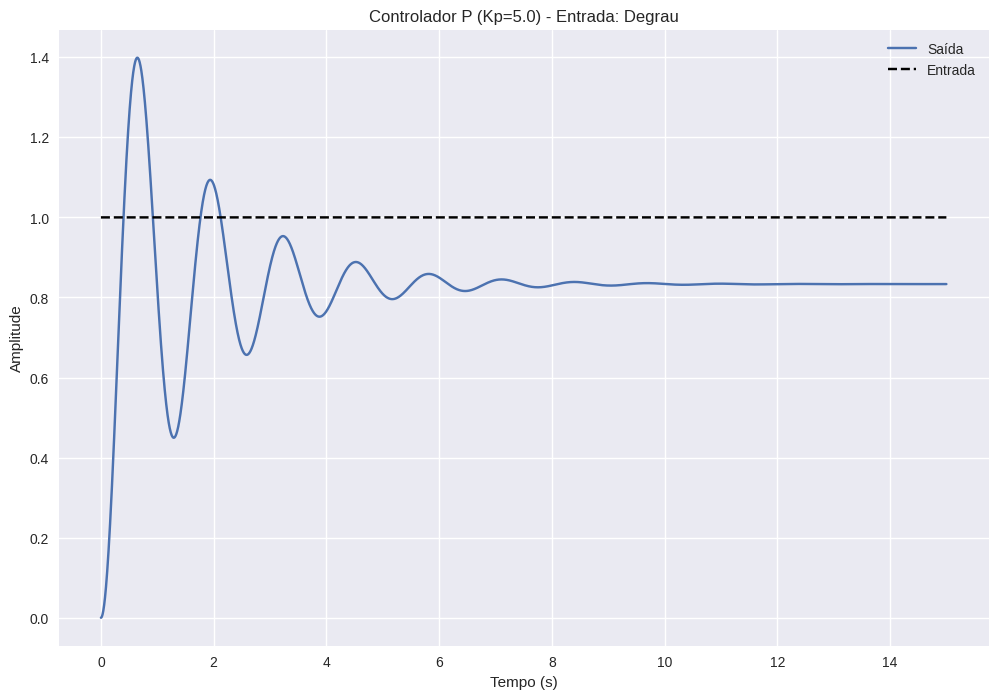

<ipython-input-13-347420ccde1d>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-13-347420ccde1d>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


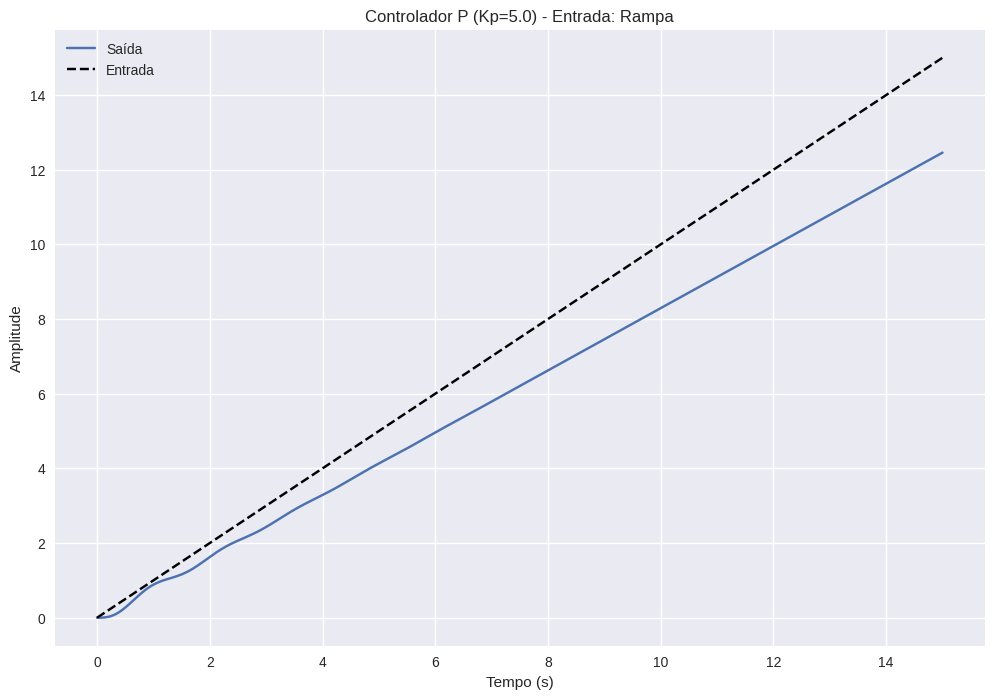

<ipython-input-13-347420ccde1d>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-13-347420ccde1d>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


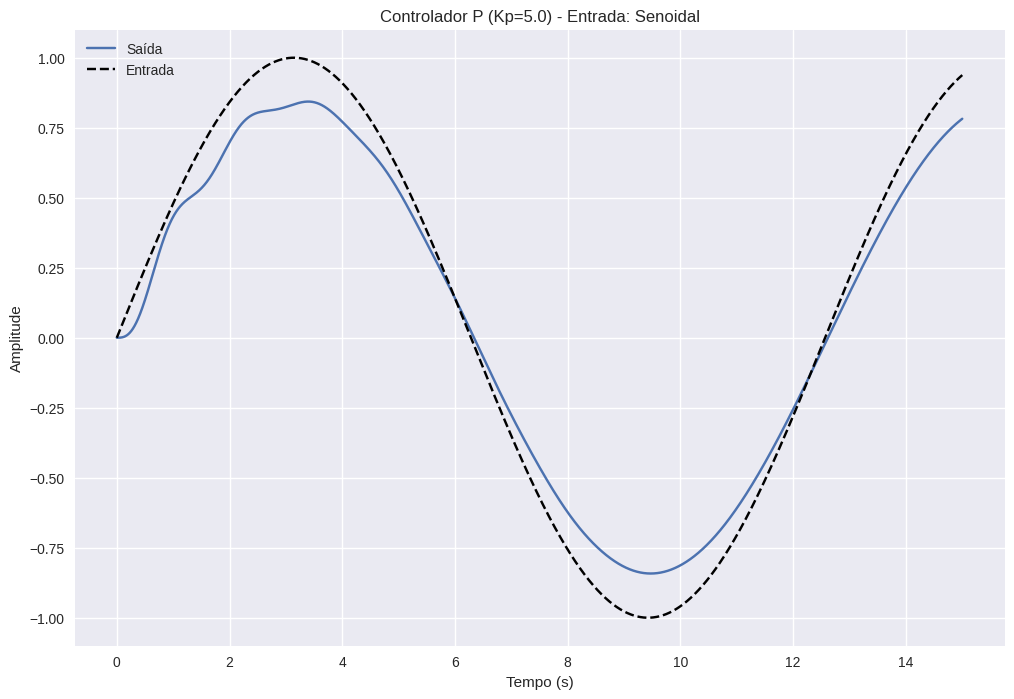

<ipython-input-13-347420ccde1d>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-13-347420ccde1d>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


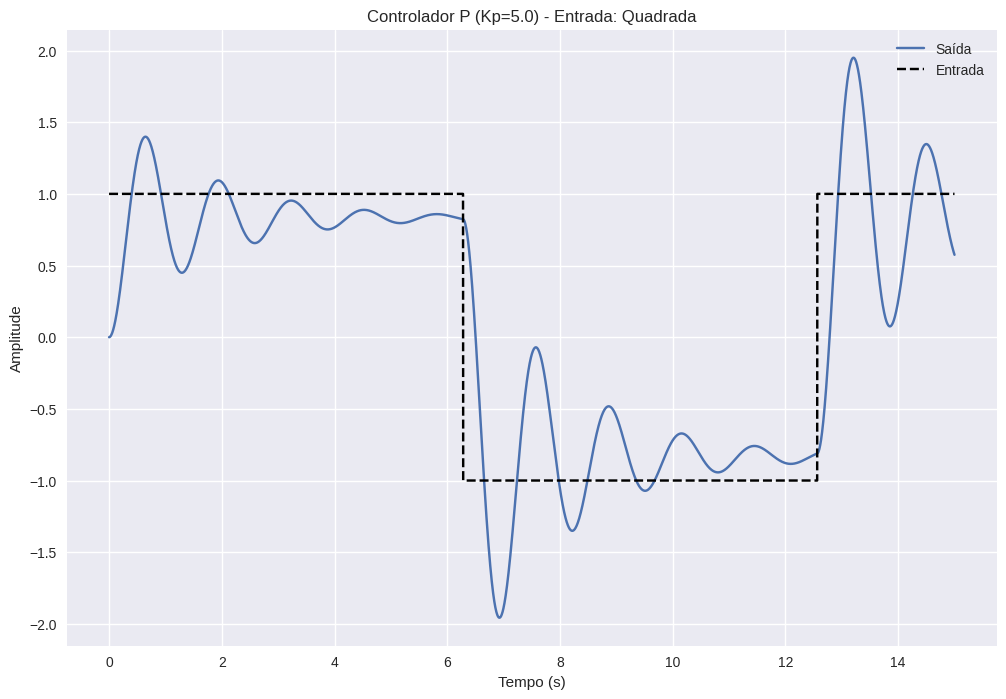

<ipython-input-13-347420ccde1d>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-13-347420ccde1d>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


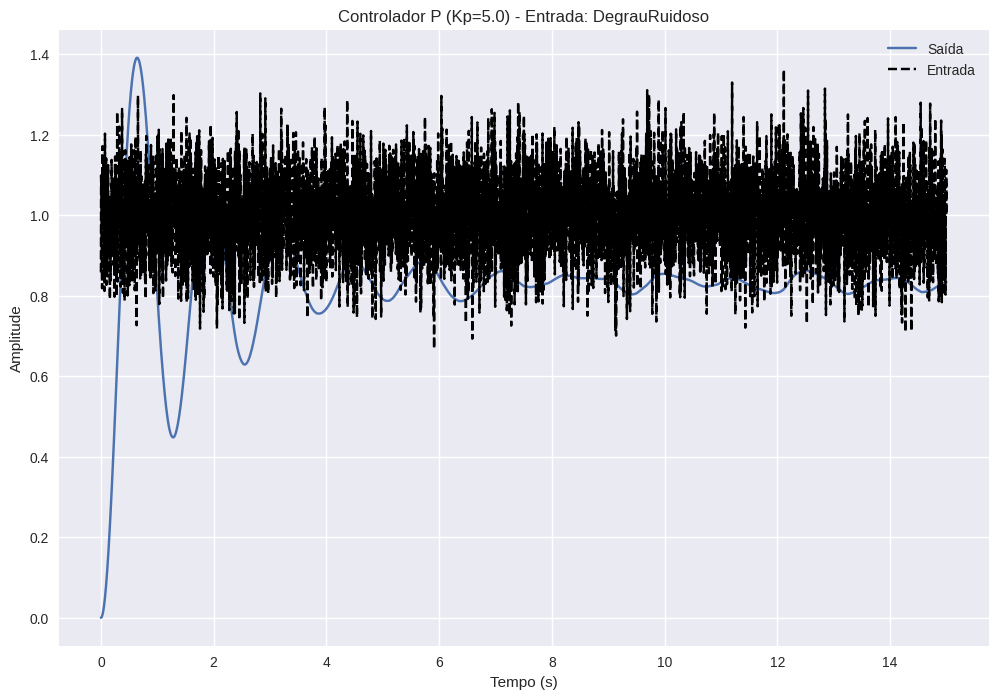


Métricas de Desempenho:


<ipython-input-13-347420ccde1d>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-13-347420ccde1d>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
Degrau,0.049244,0.221910,2.854575,18.978971,67.844104,6.520304,0.166578
Rampa,2.190460,1.480020,19.407642,192.190933,0.000000,14.702941,2.541658
Senoidal,0.012896,0.113560,1.542993,11.207269,7.850375,14.906981,0.155974
Quadrada,0.205907,0.453769,4.853219,39.117022,239.136370,14.990998,0.425010
DegrauRuidoso,0.060256,0.245472,2.964684,19.552006,66.809161,14.777956,0.168132


In [ ]:
def analyze_p_controller(Kp=5.0):
    print("\n" + "="*50)
    print("ANÁLISE DO CONTROLADOR PROPORCIONAL (P)")
    print("="*50)

    C = tf([Kp], [1])
    sys_cl = ctrl.feedback(C * sys, 1)

    metrics_p = {}

    for input_name, u in inputs.items():
        _, y = forced_response(sys_cl, t, u)
        plot_response(t, y, u, f'Controlador P (Kp={Kp}) - Entrada: {input_name}')
        metrics = calculate_metrics(t, y, u)
        metrics_p[input_name] = metrics

    metrics_df = pd.DataFrame(metrics_p).T
    print("\nMétricas de Desempenho:")
    display(metrics_df)

    return metrics_df

metrics_p = analyze_p_controller()

## Interpretação dos Resultados do Controlador P

Os gráficos gerados permitem observar o comportamento qualitativo da saída do sistema com controle proporcional. De forma geral:

- A ação proporcional reduz o erro, mas **não elimina o erro de regime permanente** para entradas do tipo rampa, por exemplo.
- O tempo de acomodação e o sobressinal variam com o valor de \( K_p \).
- Entradas oscilatórias (como senoidais e quadradas) ajudam a revelar a estabilidade e a resposta em frequência do sistema.

As métricas exibidas na tabela são fundamentais para comparar o desempenho com outras ações de controle (I, PI, PD, PID), que serão analisadas nas seções seguintes.


## Análise do Controlador Integral (I)

Nesta seção, é analisada a resposta do sistema sob a ação de um **controlador integral (I)**, cuja função de transferência é definida por:

$$
C(s) = \frac{K_i}{s}
$$

Esse tipo de controle realiza uma **integração contínua do erro ao longo do tempo**, acumulando os desvios e promovendo **a eliminação do erro de regime permanente**, especialmente eficaz para entradas do tipo degrau ou rampa.

O sistema em malha fechada é dado por:

$$
T(s) = \frac{C(s) \cdot G(s)}{1 + C(s) \cdot G(s)} = \frac{\frac{K_i}{s} \cdot G(s)}{1 + \frac{K_i}{s} \cdot G(s)}
$$

A função `analyze_i_controller(Ki)` simula a resposta do sistema para diferentes entradas (degrau, rampa, senoidal, quadrada e ruído), com ganho integral \( K_i = 1.5 \), gera os gráficos correspondentes e calcula as seguintes métricas:

- MSE, RMSE
- IAE, ITAE
- Sobressinal
- Tempo de acomodação
- Erro em regime permanente



ANÁLISE DO CONTROLADOR INTEGRAL (I)


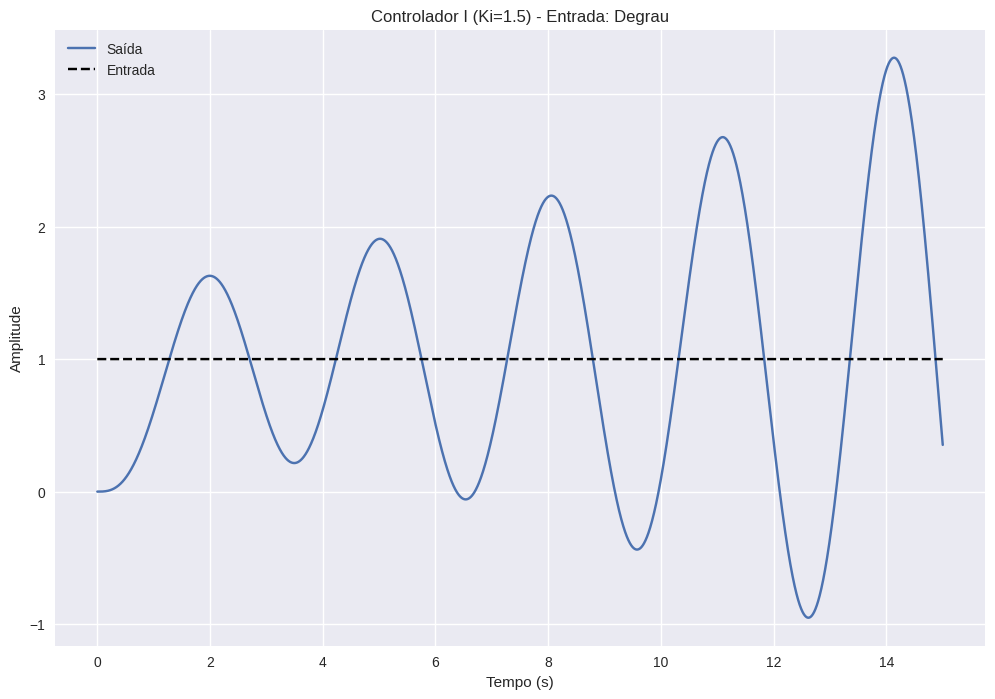

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


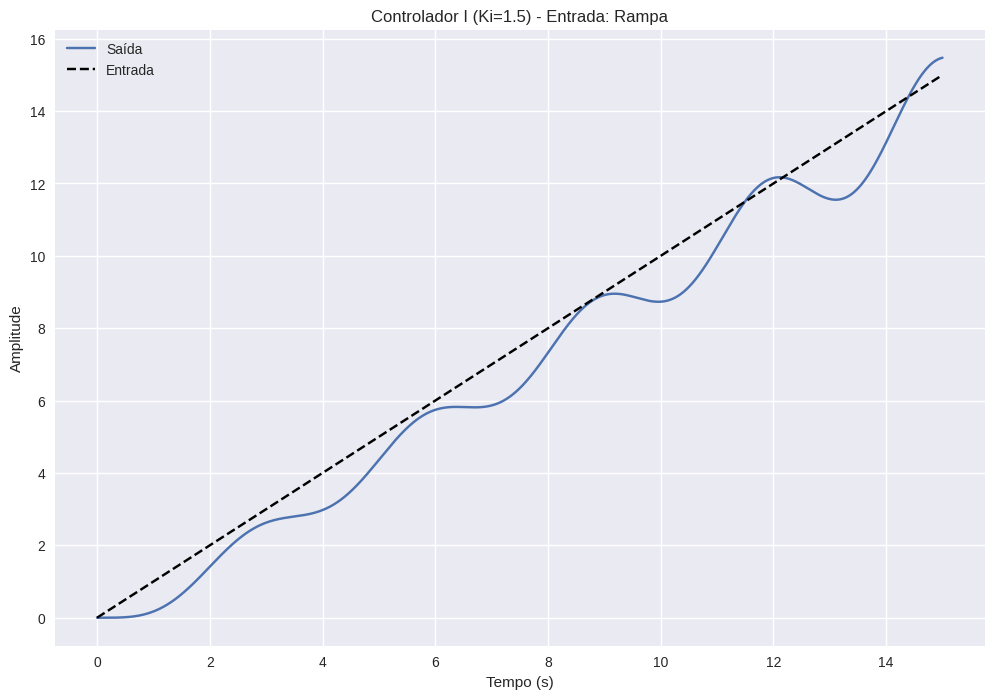

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


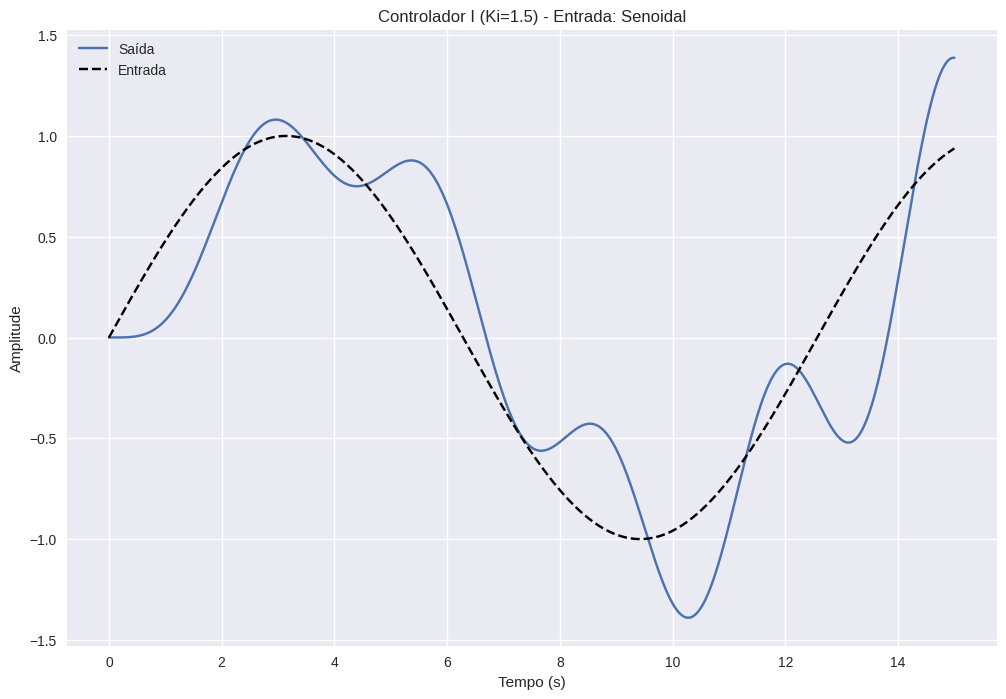

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


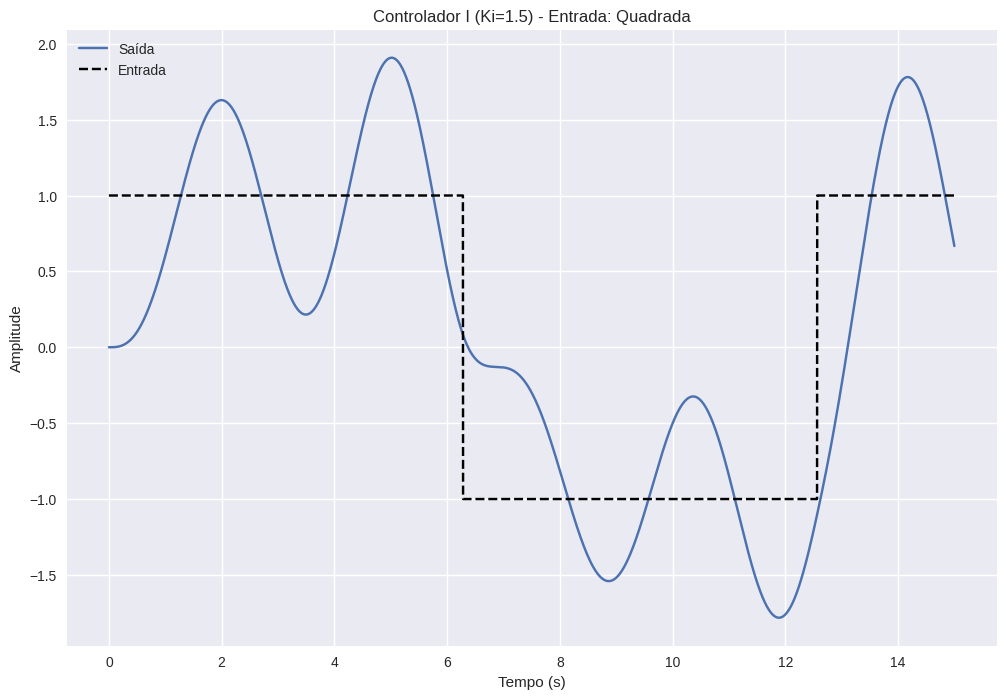

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


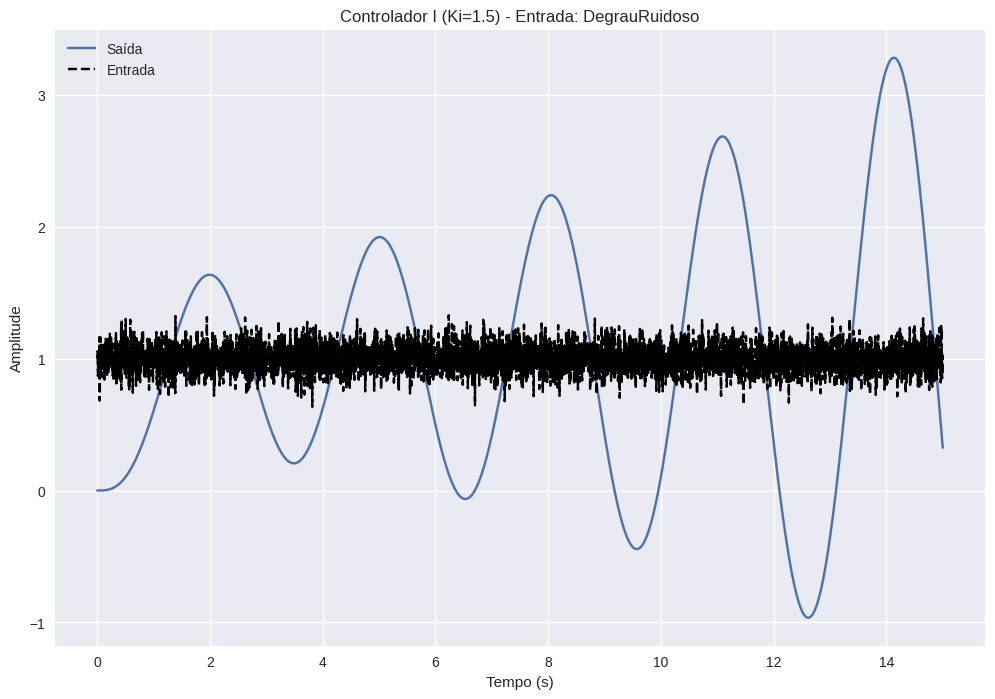


Métricas de Desempenho:


<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
Degrau,0.976919,0.988392,12.452525,111.602133,828.758532,15.000000,0.647470
Rampa,0.642144,0.801339,10.184974,80.300057,0.000000,14.714943,-0.475486
Senoidal,0.117190,0.342331,4.084194,35.451494,0.020244,14.846969,-0.449761
Quadrada,0.421716,0.649396,8.331143,63.058026,185.903029,14.993999,0.332677
DegrauRuidoso,0.999036,0.999518,12.572842,112.482309,910.773616,15.000000,0.557626


In [ ]:
def analyze_i_controller(Ki=1.5):
    print("\n" + "="*50)
    print("ANÁLISE DO CONTROLADOR INTEGRAL (I)")
    print("="*50)

    C = tf([Ki], [1, 0])
    sys_cl = ctrl.feedback(C * sys, 1)

    metrics_i = {}

    for input_name, u in inputs.items():
        _, y = forced_response(sys_cl, t, u)
        plot_response(t, y, u, f'Controlador I (Ki={Ki}) - Entrada: {input_name}')
        metrics = calculate_metrics(t, y, u)
        metrics_i[input_name] = metrics

    metrics_df = pd.DataFrame(metrics_i).T
    print("\nMétricas de Desempenho:")
    display(metrics_df)

    return metrics_df

metrics_i = analyze_i_controller()

## Interpretação dos Resultados do Controlador I

A resposta do sistema com ação de controle integral apresenta as seguintes características:

- **Elimina o erro de regime permanente**, mesmo para entradas como rampa.
- Pode gerar **respostas lentas** ou com altos valores de pico (overshoot), especialmente em sistemas com inércia.
- A integração contínua do erro pode levar à **saturação ou instabilidade** (conhecida como efeito “windup”) se não for utilizada alguma forma de limitação.

A tabela de métricas permite comparar a eficácia dessa ação com outras abordagens (como P, PI, PID). Nos casos em que precisão em regime é prioritária, o controlador I tende a se destacar — porém, seu uso isolado raramente é recomendado devido à baixa performance transitória.


## Análise do Controlador Proporcional-Integral (PI)

Nesta etapa, analisamos o comportamento do sistema sob a ação de um **controlador PI**, que combina os efeitos do controle proporcional (resposta rápida) com o controle integral (eliminação do erro de regime).

A função de transferência do controlador PI é dada por:

$$
C(s) = K_p + \frac{K_i}{s} = \frac{K_p s + K_i}{s}
$$

O sistema em malha fechada torna-se:

$$
T(s) = \frac{C(s) \cdot G(s)}{1 + C(s) \cdot G(s)} = \frac{\left(\frac{K_p s + K_i}{s}\right) \cdot G(s)}{1 + \left(\frac{K_p s + K_i}{s}\right) \cdot G(s)}
$$

A função `analyze_pi_controller(Kp, Ki)` executa a simulação para diversas entradas (degrau, rampa, senoidal, quadrada e degrau ruidoso) com parâmetros \( K_p = 4.0 \) e \( K_i = 2.0 \). Os resultados incluem gráficos e métricas quantitativas:

- MSE, RMSE
- IAE, ITAE
- Overshoot
- Tempo de acomodação
- Erro em regime permanente



ANÁLISE DO CONTROLADOR PI


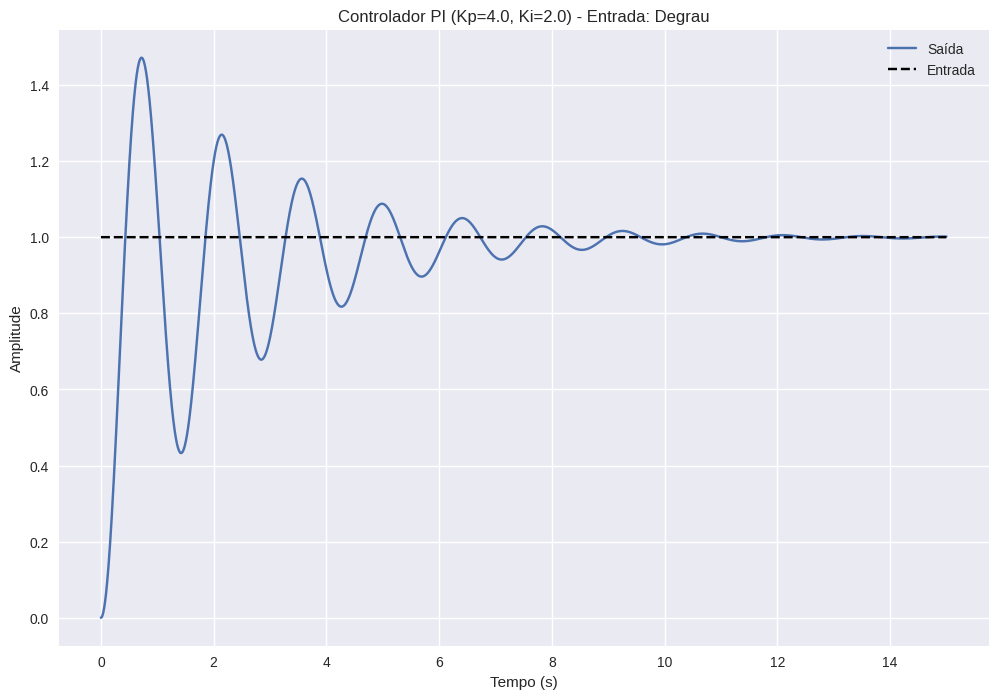

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


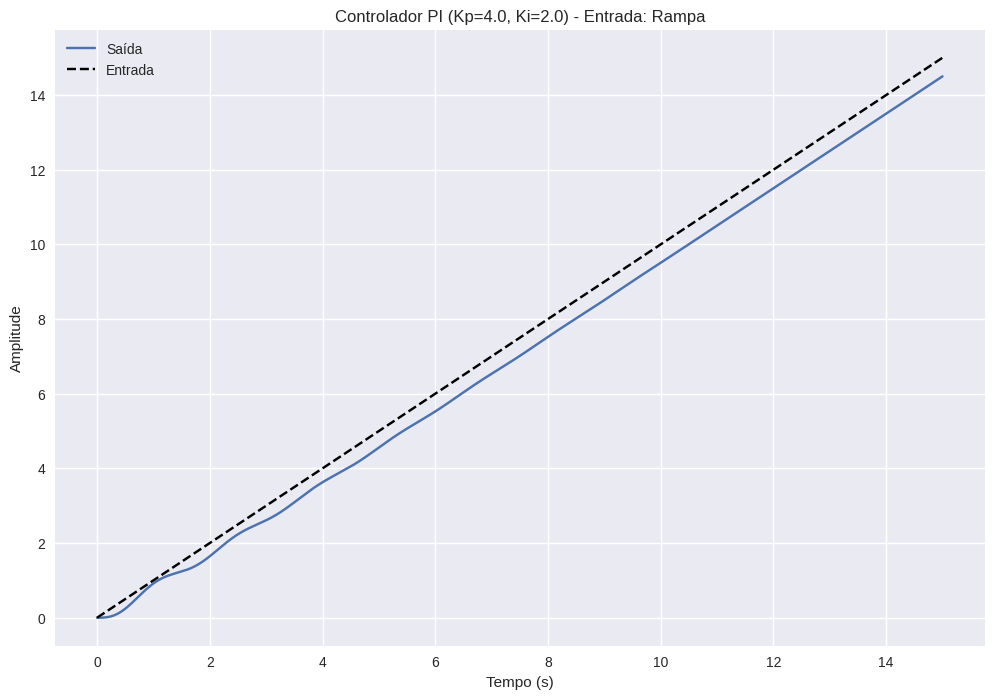

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


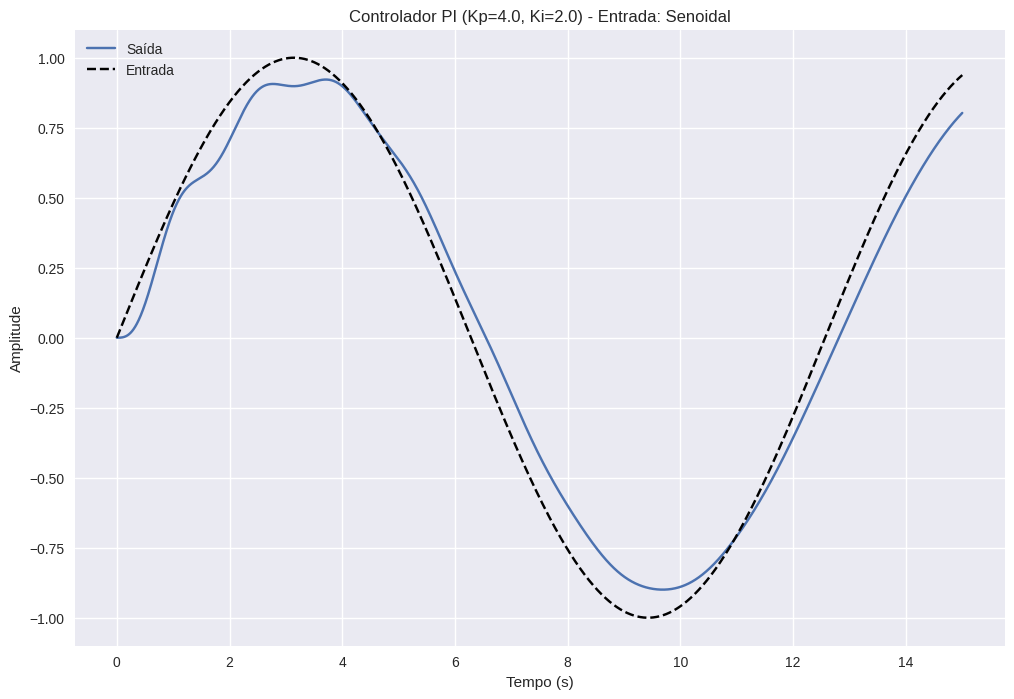

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


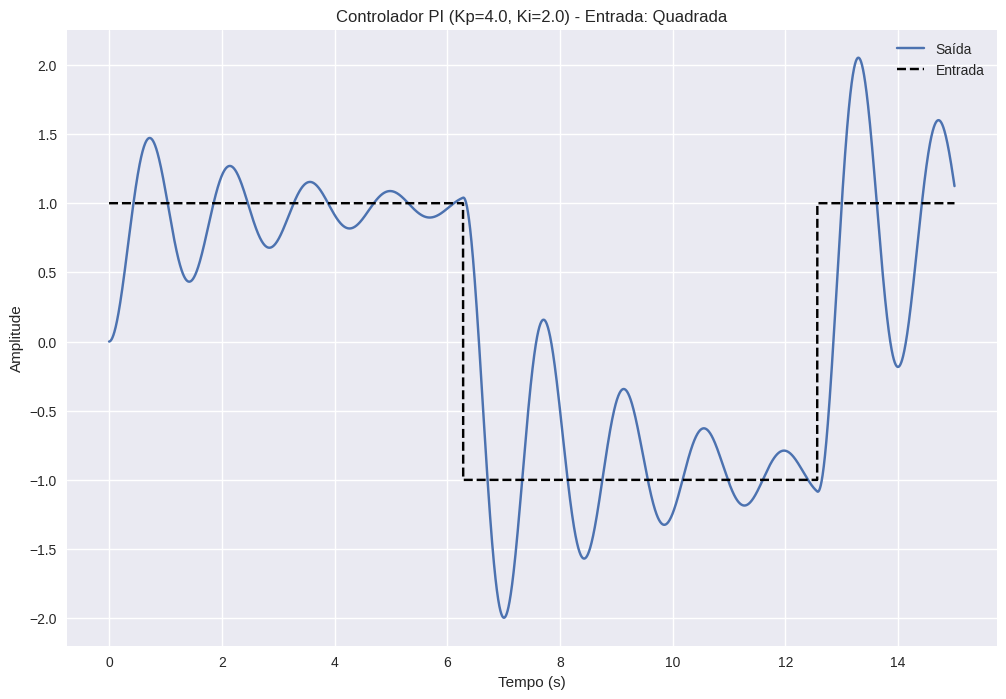

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


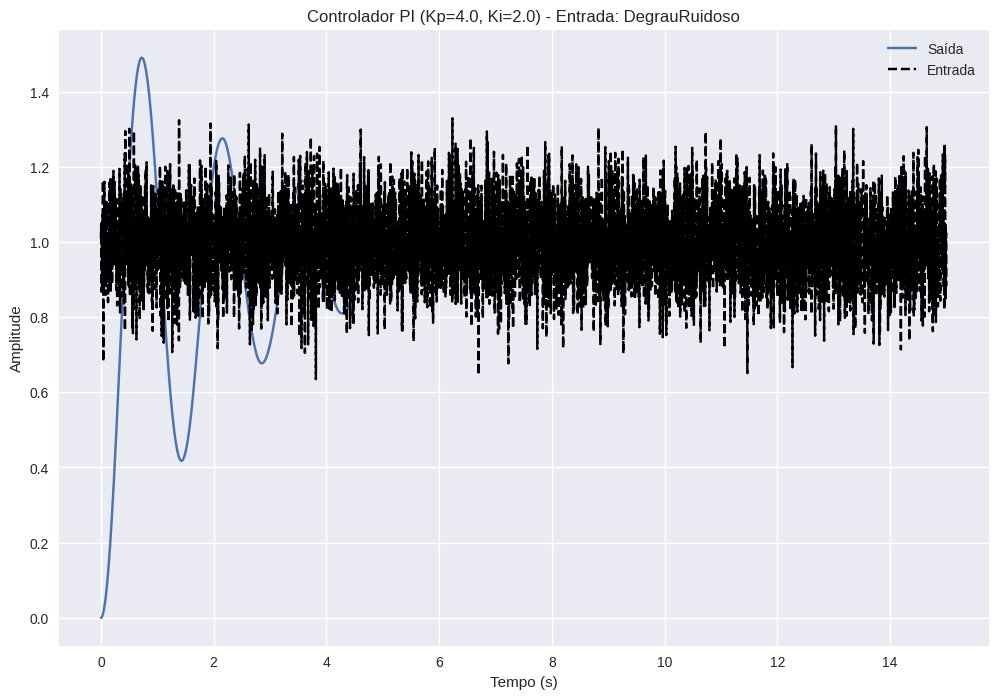


Métricas de Desempenho:


<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
Degrau,0.033093,0.181915,1.358291,3.307607,46.912269,10.019004,-0.001665
Rampa,0.193447,0.439826,6.402668,53.496329,0.000000,14.711942,0.498912
Senoidal,0.011138,0.105536,1.411928,11.449210,14.856470,14.927986,0.135175
Quadrada,0.300956,0.548595,5.650356,48.133653,82.594361,14.993999,-0.123619
DegrauRuidoso,0.044293,0.210459,2.118852,10.646952,47.369842,14.456891,-0.128917


In [ ]:
def analyze_pi_controller(Kp=4.0, Ki=2.0):
    print("\n" + "="*50)
    print("ANÁLISE DO CONTROLADOR PI")
    print("="*50)

    C = tf([Kp, Ki], [1, 0])
    sys_cl = ctrl.feedback(C * sys, 1)

    metrics_pi = {}

    for input_name, u in inputs.items():
        _, y = forced_response(sys_cl, t, u)
        plot_response(t, y, u, f'Controlador PI (Kp={Kp}, Ki={Ki}) - Entrada: {input_name}')
        metrics = calculate_metrics(t, y, u)
        metrics_pi[input_name] = metrics

    metrics_df = pd.DataFrame(metrics_pi).T
    print("\nMétricas de Desempenho:")
    display(metrics_df)

    return metrics_df

metrics_pi = analyze_pi_controller()

## Interpretação dos Resultados do Controlador PI

O controlador PI apresenta vantagens tanto no regime transitório quanto no regime permanente:

- Reduz significativamente o **erro de regime permanente**, especialmente para entradas constantes e lineares.
- Melhora a velocidade de resposta em comparação com o controlador I isolado.
- Pode provocar **sobressinal** (overshoot) e aumentar o tempo de acomodação se os ganhos \( K_p \) e \( K_i \) forem mal ajustados.

A análise gráfica e as métricas quantitativas obtidas permitem concluir que o controlador PI é uma **solução eficaz e bastante utilizada em sistemas onde é necessário eliminar o erro estacionário sem comprometer tanto a estabilidade quanto o tempo de resposta**.


## Análise do Controlador Proporcional-Derivativo (PD)

Nesta seção, analisamos a atuação de um **controlador PD**, cuja função de transferência é dada por:

$$
C(s) = K_p + K_d s = K_d s + K_p
$$

Este tipo de controlador antecipa a tendência de variação do erro, o que permite **melhorar a estabilidade e reduzir o sobressinal** (overshoot). O controle derivativo é especialmente útil para sistemas com comportamento lento ou onde há risco de oscilações.

O sistema em malha fechada com um controlador PD é:

$$
T(s) = \frac{C(s) \cdot G(s)}{1 + C(s) \cdot G(s)} = \frac{(K_d s + K_p) \cdot G(s)}{1 + (K_d s + K_p) \cdot G(s)}
$$

A função `analyze_pd_controller(Kp, Kd)` aplica esse controlador ao sistema para diversas entradas (degrau, rampa, senoidal, quadrada e degrau ruidoso), com ganhos \( K_p = 6.0 \) e \( K_d = 1.2 \), gerando:

- Gráficos comparativos de entrada e saída
- Métricas quantitativas de desempenho (erro, tempo de acomodação, overshoot, etc.)



ANÁLISE DO CONTROLADOR PD


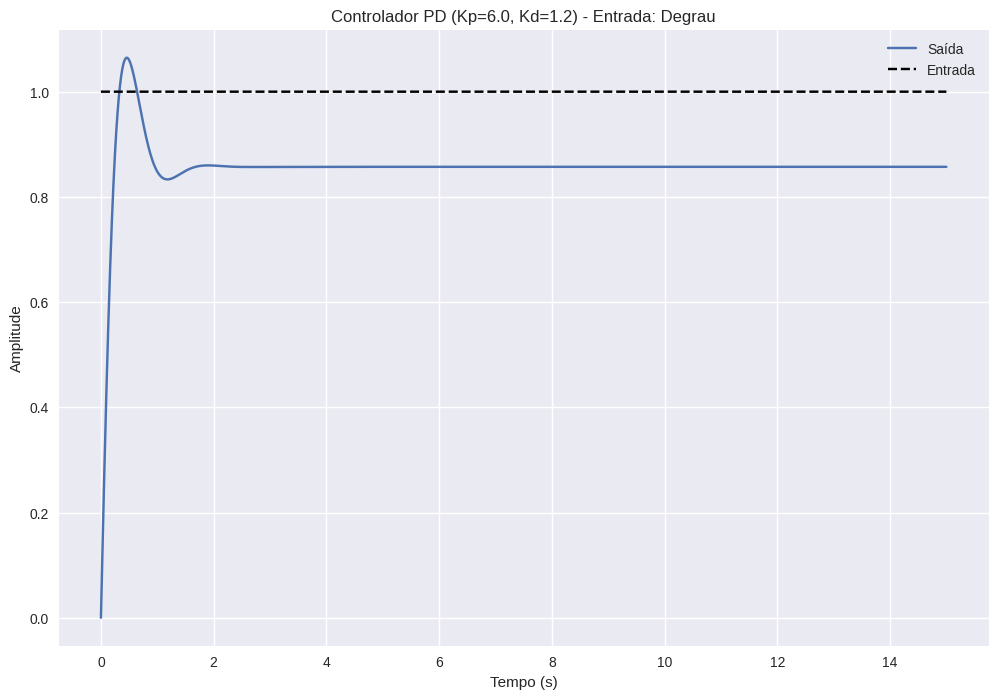

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


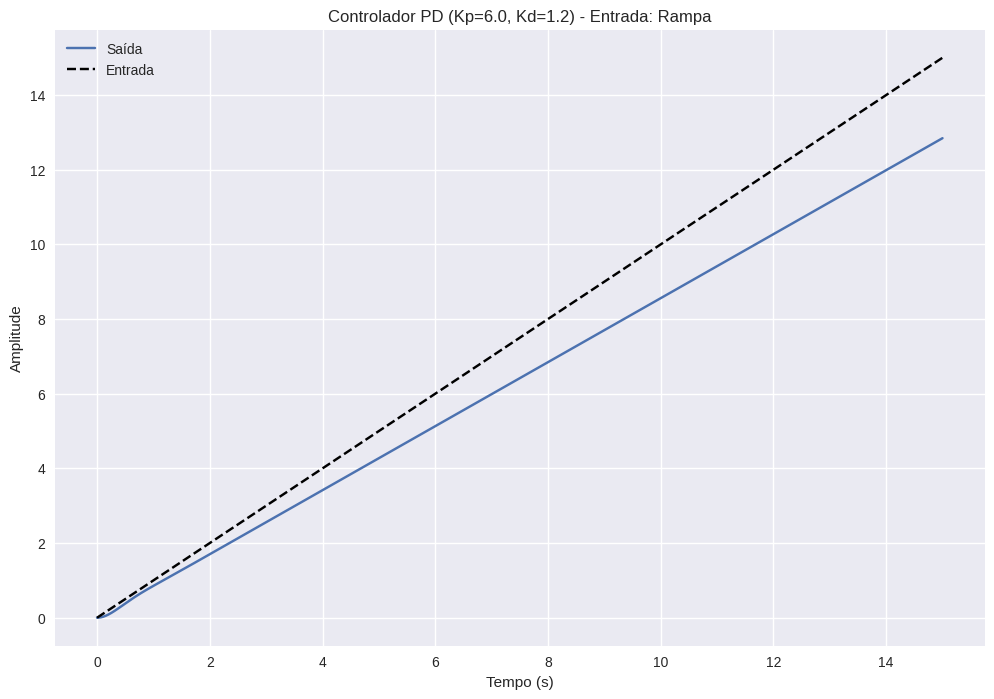

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


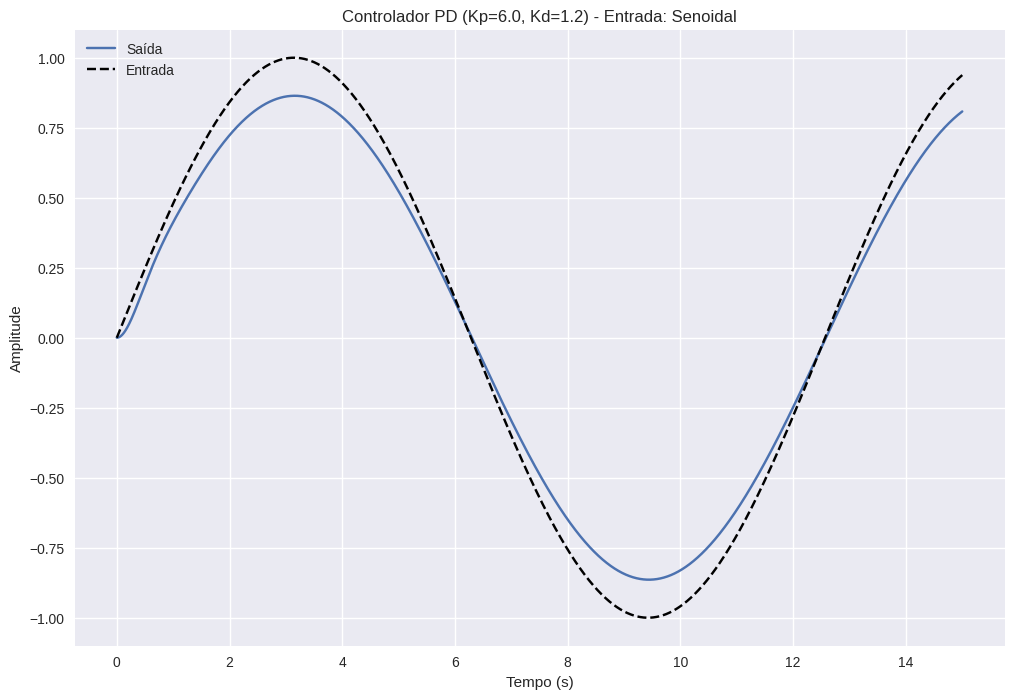

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


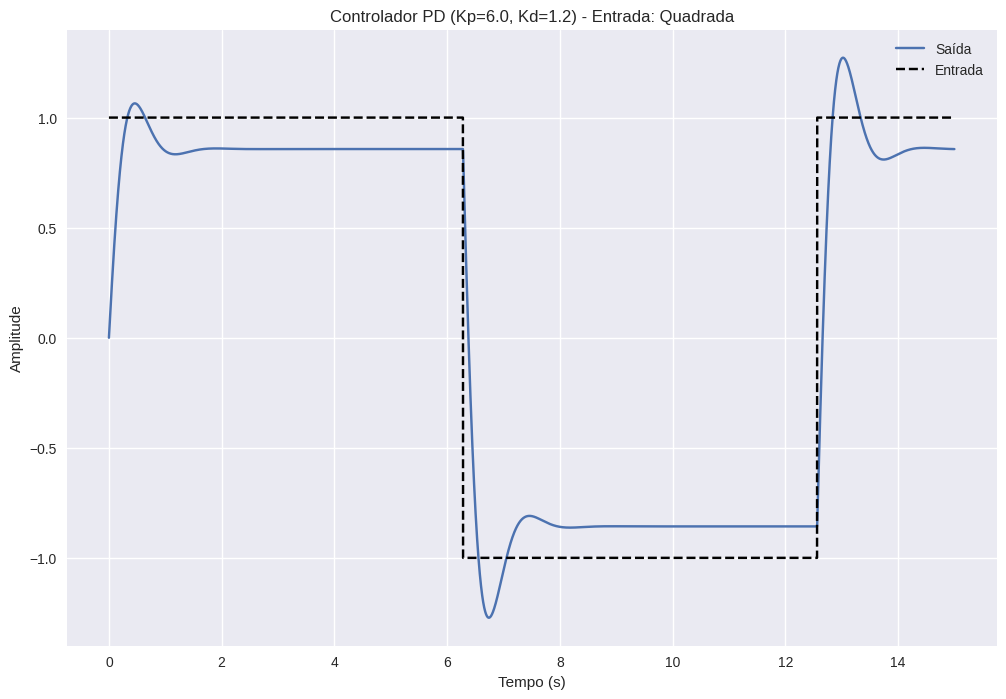

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


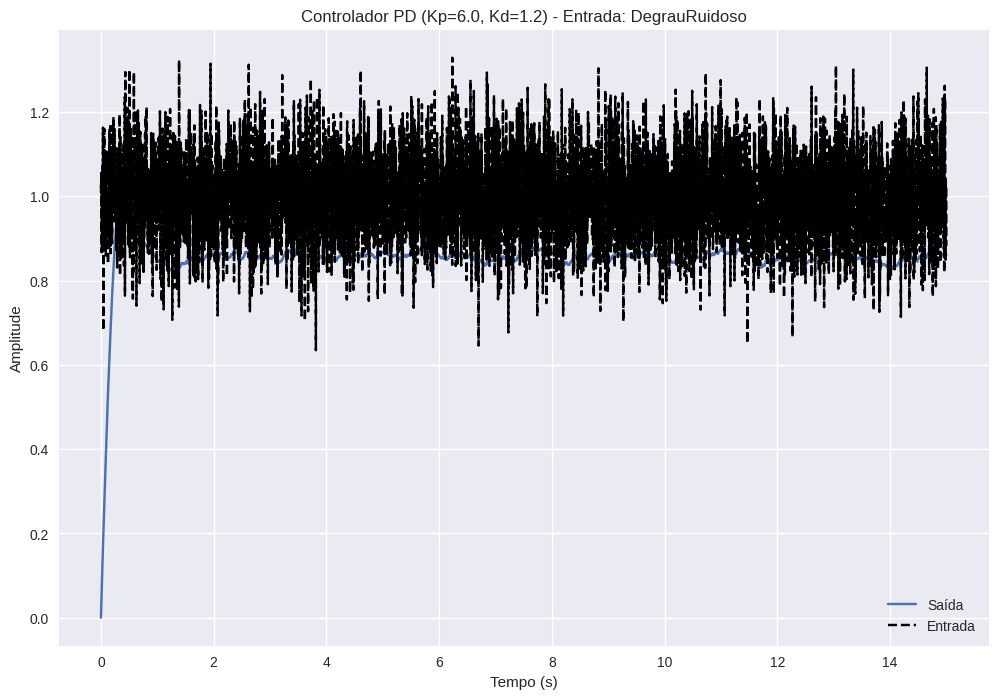


Métricas de Desempenho:


<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
Degrau,0.024844,0.157620,2.181602,16.055991,24.199143,1.353271,0.142857
Rampa,1.557445,1.247976,16.283090,162.098275,0.000000,14.702941,2.155102
Senoidal,0.009040,0.095081,1.293003,9.424766,6.929386,14.900980,0.129862
Quadrada,0.058604,0.242083,2.568932,19.760067,48.432446,14.051810,0.143066
DegrauRuidoso,0.034972,0.187008,2.306450,16.841235,25.141393,14.165833,0.021580


In [ ]:
def analyze_pd_controller(Kp=6.0, Kd=1.2):
    print("\n" + "="*50)
    print("ANÁLISE DO CONTROLADOR PD")
    print("="*50)

    C = tf([Kd, Kp], [1])
    sys_cl = ctrl.feedback(C * sys, 1)

    metrics_pd = {}

    for input_name, u in inputs.items():
        _, y = forced_response(sys_cl, t, u)
        plot_response(t, y, u, f'Controlador PD (Kp={Kp}, Kd={Kd}) - Entrada: {input_name}')
        metrics = calculate_metrics(t, y, u)
        metrics_pd[input_name] = metrics

    metrics_df = pd.DataFrame(metrics_pd).T
    print("\nMétricas de Desempenho:")
    display(metrics_df)

    return metrics_df

metrics_pd = analyze_pd_controller()

## Interpretação dos Resultados do Controlador PD

A análise do controlador PD mostra que:

- O termo derivativo introduz **ação antecipatória**, o que pode reduzir o sobressinal e melhorar a resposta transitória.
- O erro de regime permanente **não é eliminado**, pois não há componente integral.
- A presença da derivada torna o sistema mais **sensível a ruídos** (especialmente em sinais com alta frequência ou ruído branco).

Portanto, o controle PD é eficaz para melhorar a resposta rápida e compensar o atraso de sistemas lentos, sendo ideal para aplicações em que o comportamento transitório é mais crítico do que a eliminação do erro final.

A tabela de métricas quantitativas obtida permite comparar o desempenho do controlador PD com os demais tipos (P, I, PI, PID), ajudando na escolha da estratégia mais adequada.


## Análise do Controlador Proporcional-Integral-Derivativo (PID)

Nesta etapa, é realizada a análise de um **controlador PID**, considerado o mais versátil e utilizado na prática da engenharia de controle. Sua função de transferência é dada por:

$$
C(s) = K_p + \frac{K_i}{s} + K_d s = \frac{K_d s^2 + K_p s + K_i}{s}
$$

A combinação das três ações permite que o controlador:

- **Proporcional (P):** reaja ao erro presente.
- **Integral (I):** elimine o erro de regime permanente acumulando o erro ao longo do tempo.
- **Derivativo (D):** antecipe a tendência de variação do erro, melhorando o comportamento transitório.

A função `analyze_pid_controller(Kp, Ki, Kd)` simula o sistema em malha fechada com os valores \( K_p = 8.0 \), \( K_i = 3.0 \), \( K_d = 2.0 \), aplicando entradas como:

- Degrau
- Rampa
- Senoidal
- Onda quadrada
- Degrau com ruído

E gera:
- Gráficos entrada vs. saída
- Métricas de desempenho quantitativo (erro, tempo de acomodação, overshoot, erro de regime, etc.)



ANÁLISE DO CONTROLADOR PID


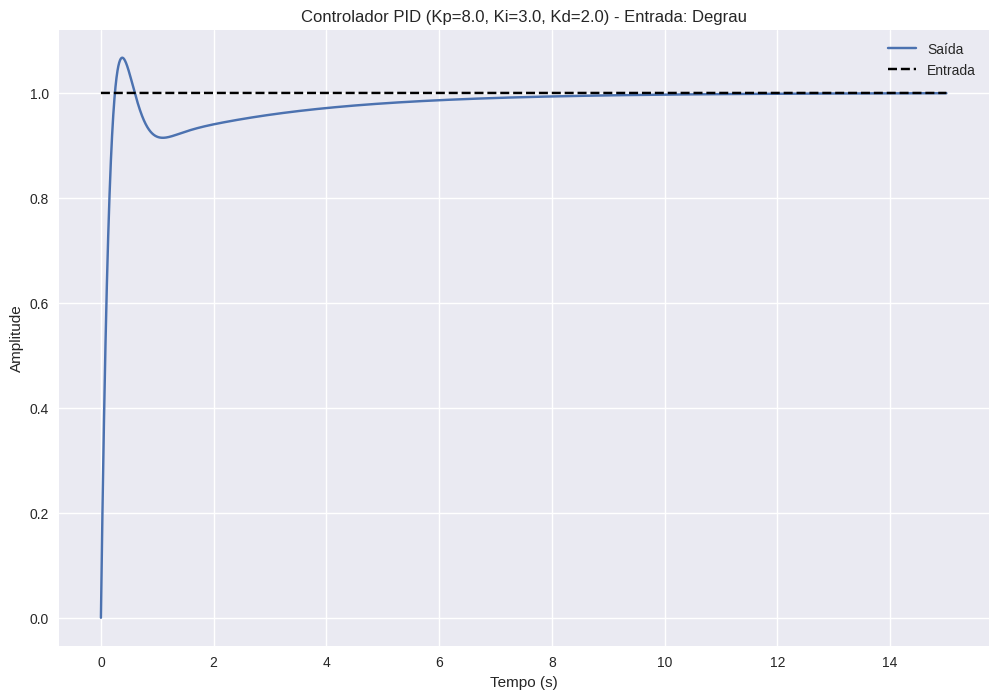

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


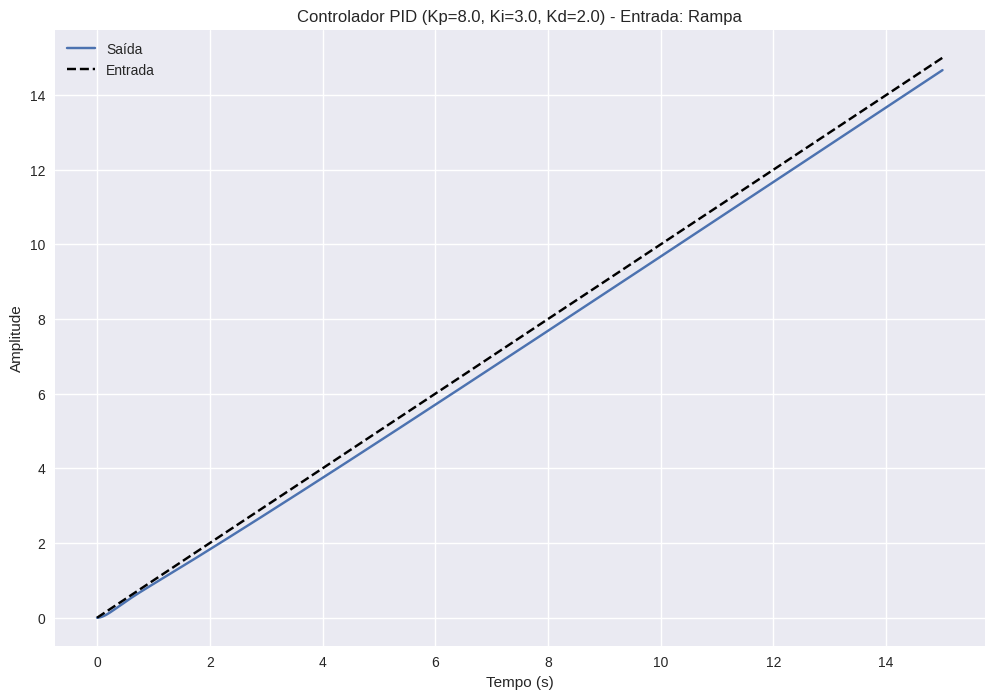

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


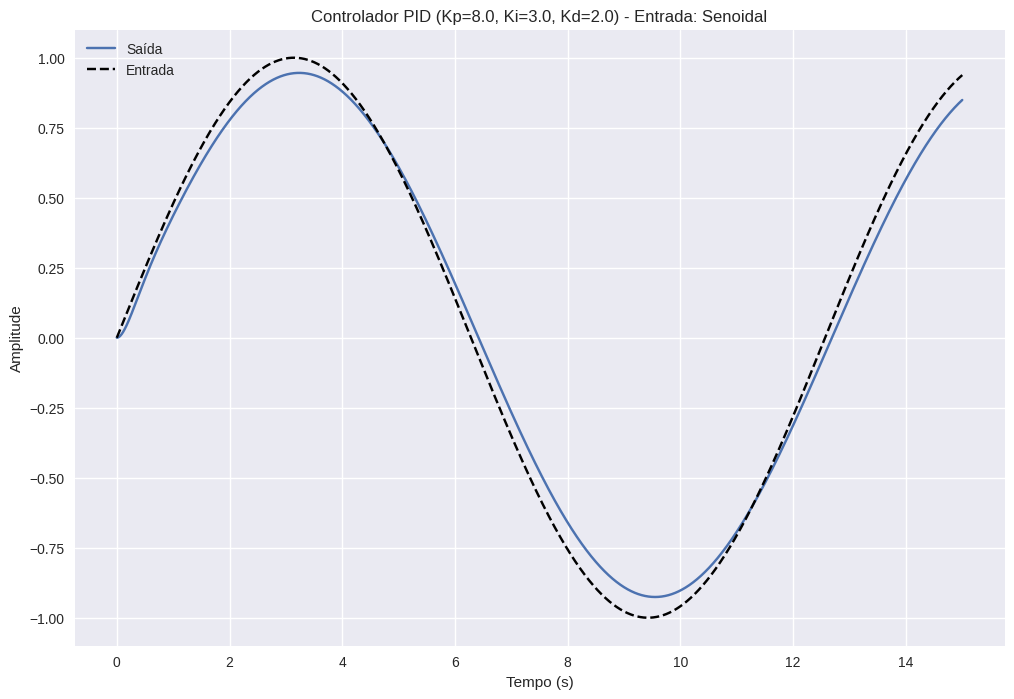

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


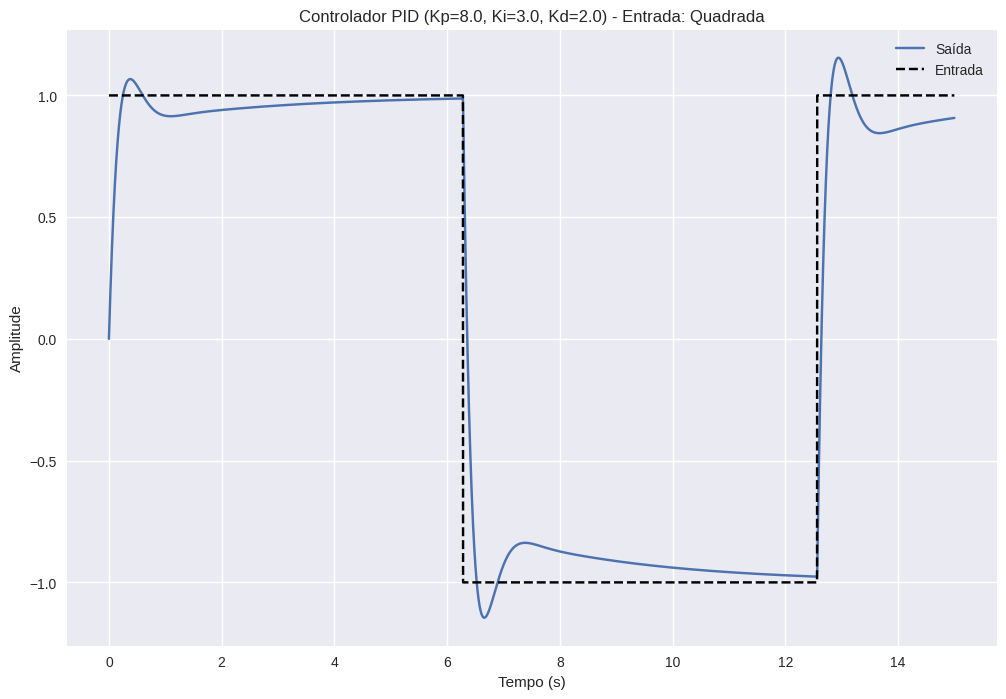

<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


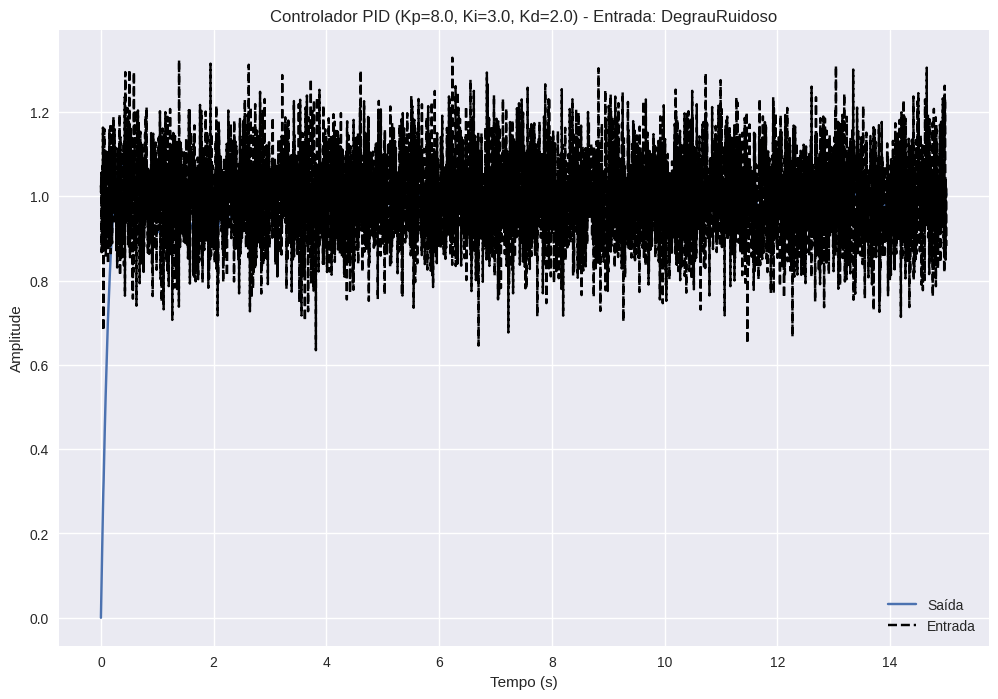


Métricas de Desempenho:


<ipython-input-8-ddcedd783417>:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  iae = np.trapz(np.abs(error), t)
<ipython-input-8-ddcedd783417>:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  itae = np.trapz(t * np.abs(error), t)


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
Degrau,0.004455,0.066748,0.362002,0.887369,6.767162,4.926985,0.000512
Rampa,0.080726,0.284123,4.103818,35.039928,0.000000,14.708942,0.331935
Senoidal,0.003982,0.063106,0.852530,6.936022,11.389809,14.915983,0.088902
Quadrada,0.036846,0.191954,1.389871,11.438620,27.236161,14.510902,0.092341
DegrauRuidoso,0.014530,0.120540,1.331037,9.159858,6.923162,14.489898,-0.121555


In [ ]:
def analyze_pid_controller(Kp=8.0, Ki=3.0, Kd=2.0):
    print("\n" + "="*50)
    print("ANÁLISE DO CONTROLADOR PID")
    print("="*50)

    C = tf([Kd, Kp, Ki], [1, 0])
    sys_cl = ctrl.feedback(C * sys, 1)

    metrics_pid = {}

    for input_name, u in inputs.items():
        _, y = forced_response(sys_cl, t, u)
        plot_response(t, y, u, f'Controlador PID (Kp={Kp}, Ki={Ki}, Kd={Kd}) - Entrada: {input_name}')
        metrics = calculate_metrics(t, y, u)
        metrics_pid[input_name] = metrics

    metrics_df = pd.DataFrame(metrics_pid).T
    print("\nMétricas de Desempenho:")
    display(metrics_df)

    return metrics_df

metrics_pid = analyze_pid_controller()

## Interpretação dos Resultados do Controlador PID

O controlador PID oferece **o melhor compromisso entre velocidade de resposta, estabilidade e precisão**, sendo amplamente utilizado em sistemas industriais e automação.

Com base nas simulações e nas métricas:

- O termo **proporcional** reduz o erro imediato.
- O **integral** elimina o erro de regime permanente.
- O **derivativo** antecipa a correção e evita oscilações excessivas.

Entretanto, o ajuste fino dos parâmetros \( K_p, K_i, K_d \) é essencial para evitar instabilidade, overshoot elevado ou ação excessivamente lenta.

A combinação das métricas MSE, IAE, ITAE, overshoot e tempo de acomodação fornece uma base sólida para comparar o desempenho entre diferentes controladores e justificar a escolha pelo PID em muitos cenários práticos.


## Análise Comparativa dos Controladores

Com base nas simulações realizadas para os controladores P, I, PI, PD e PID, é possível agora realizar uma **análise comparativa global** dos seus desempenhos médios.

A função `comparative_analysis(...)` recebe os DataFrames de métricas de cada controlador e executa:

- Cálculo da **média das métricas** para cada controlador;
- Identificação do **melhor** e **pior desempenho** em cada critério;
- Cálculo da **porcentagem de melhoria relativa** do melhor em relação ao pior;
- Geração de **gráficos de barras** por métrica para facilitar a visualização.

As métricas consideradas são:

- **RMSE (Root Mean Square Error)** – Erro médio quadrático da saída em relação à entrada.
- **IAE (Integral of Absolute Error)** – Integral do erro absoluto ao longo do tempo.
- **ITAE (Integral of Time-weighted Absolute Error)** – Penaliza erros tardios.
- **Settling Time** – Tempo até a resposta estabilizar dentro da faixa de tolerância.
- **Overshoot (%)** – Sobressinal, ou quanto a saída ultrapassa o valor de referência.



ANÁLISE COMPARATIVA GERAL

Média das Métricas por Controlador:


,MSE,RMSE,IAE,ITAE,Overshoot (%),SettlingTime,SteadyStateError
P,0.503620,0.502675,6.321834,56.196910,76.700714,13.095219,0.666509
I,0.631401,0.756195,9.525136,80.578804,385.091084,14.911182,0.122505
PI,0.116585,0.297266,3.388419,25.406750,38.346588,13.821964,0.075977
PD,0.336981,0.385953,4.926615,44.836067,20.940473,11.834967,0.518494
PID,0.028108,0.145294,1.607852,12.692360,10.463259,12.710542,0.078427



--------------------------------------------------
DESTAQUES POR MÉTRICA:
--------------------------------------------------

RMSE:
Melhor: PID (0.1453)
Pior: I (0.7562)
Melhoria: 80.79%

IAE:
Melhor: PID (1.6079)
Pior: I (9.5251)
Melhoria: 83.12%

ITAE:
Melhor: PID (12.6924)
Pior: I (80.5788)
Melhoria: 84.25%

SettlingTime:
Melhor: PD (11.8350)
Pior: I (14.9112)
Melhoria: 20.63%

Overshoot (%):
Melhor: PID (10.4633)
Pior: I (385.0911)
Melhoria: 97.28%


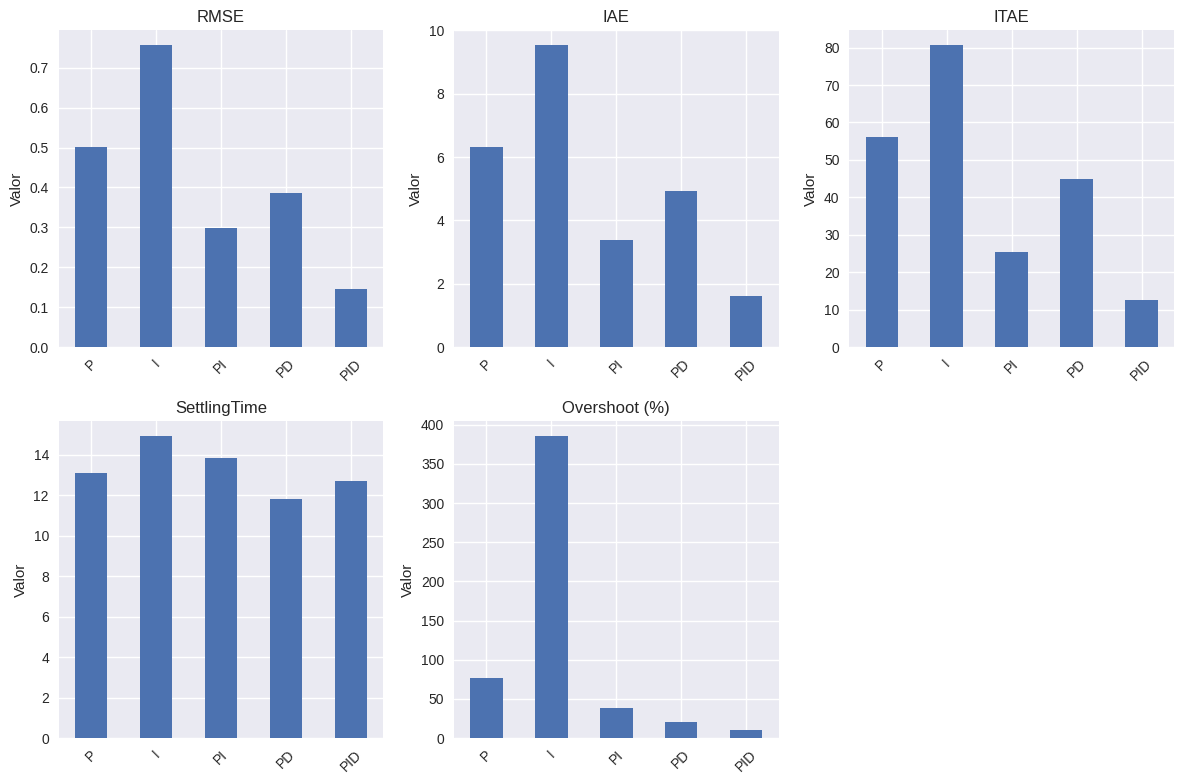

In [ ]:
def comparative_analysis(metrics_p, metrics_i, metrics_pi, metrics_pd, metrics_pid):
    print("\n" + "="*50)
    print("ANÁLISE COMPARATIVA GERAL")
    print("="*50)

    # Prepara dados para comparação
    controllers = {
        'P': metrics_p.mean(),
        'I': metrics_i.mean(),
        'PI': metrics_pi.mean(),
        'PD': metrics_pd.mean(),
        'PID': metrics_pid.mean()
    }

    comparison_df = pd.DataFrame(controllers).T

    # Exibe tabela comparativa
    print("\nMédia das Métricas por Controlador:")
    display(comparison_df)

    # Análise por métrica
    print("\n" + "-"*50)
    print("DESTAQUES POR MÉTRICA:")
    print("-"*50)

    metrics_to_compare = ['RMSE', 'IAE', 'ITAE', 'SettlingTime', 'Overshoot (%)']

    for metric in metrics_to_compare:
        best = comparison_df[metric].idxmin()
        worst = comparison_df[metric].idxmax()
        improvement = (comparison_df.loc[worst, metric] - comparison_df.loc[best, metric]) / comparison_df.loc[worst, metric] * 100

        print(f"\n{metric}:")
        print(f"Melhor: {best} ({comparison_df.loc[best, metric]:.4f})")
        print(f"Pior: {worst} ({comparison_df.loc[worst, metric]:.4f})")
        print(f"Melhoria: {improvement:.2f}%")

    # Gráfico comparativo
    plt.figure(figsize=(12, 8))
    for i, metric in enumerate(metrics_to_compare, 1):
        plt.subplot(2, 3, i)
        comparison_df[metric].plot(kind='bar')
        plt.title(metric)
        plt.ylabel('Valor')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return comparison_df

comparison_results = comparative_analysis(metrics_p, metrics_i, metrics_pi, metrics_pd, metrics_pid)

## Interpretação dos Resultados Comparativos

Com base na média das métricas obtidas, é possível observar tendências gerais:

- Controladores com ação **integral** (I, PI, PID) tendem a eliminar o erro de regime, mas podem causar overshoot maior.
- Controladores com ação **derivativa** (PD, PID) contribuem para **respostas mais rápidas e estáveis**, reduzindo o overshoot.
- O controlador **PID** frequentemente apresenta o melhor **equilíbrio entre tempo de acomodação, erro e estabilidade**, justificando seu uso prático generalizado.

A análise quantitativa ajuda na **tomada de decisão baseada em critérios objetivos**, permitindo selecionar o tipo de controlador mais adequado para um sistema específico, conforme a prioridade do projeto (velocidade, estabilidade, precisão, etc.).

A visualização gráfica também facilita a comunicação dos resultados, sendo ideal para relatórios e apresentações.


## Otimização dos Parâmetros do Controlador

Nesta seção, aplicamos técnicas de **otimização numérica** para encontrar os parâmetros ideais de controladores P, PI e PID com base em critérios de desempenho do sistema.

A otimização é realizada com a função `scipy.optimize.minimize`, que ajusta os ganhos \( K_p \), \( K_i \), \( K_d \) para minimizar uma **função objetivo** composta por:

- **Tempo de acomodação** \( T_s \) — quanto menor, mais rápida a resposta.
- **Sobressinal (Overshoot)** — penalizado com peso maior para evitar oscilações excessivas.

### Função Objetivo:

Para o caso PID, a função objetivo é:

$$
J(K_p, K_i, K_d) = T_s + 10 \cdot OS
$$

Onde:
- \( T_s \) é o tempo de acomodação obtido da função `step_info`;
- \( OS \) é o overshoot (em %).

### Restrições:
A otimização é feita com **limites** (bounds) definidos para evitar parâmetros extremos:

- $ 0 \leq K_p \leq 10 $
- $ 0 \leq K_i \leq 5 $
- $ 0 \leq K_d \leq 5 $

Este processo é útil para afinar automaticamente o controlador de acordo com critérios objetivos, economizando tempo e melhorando o desempenho final do sistema.


In [ ]:
from scipy.optimize import minimize

def objective_function(params, controller_type):
    Kp, Ki, Kd = params if controller_type == 'PID' else (params[0], params[1], 0)

    # Construir controlador
    if controller_type == 'P':
        C = tf([Kp], [1])
    elif controller_type == 'PI':
        C = tf([Kp, Ki], [1, 0])
    elif controller_type == 'PID':
        C = tf([Kd, Kp, Ki], [1, 0])

    sys_cl = ctrl.feedback(C * sys, 1)
    _, y = step_response(sys_cl, t)
    info = step_info(y, t)
    return info['SettlingTime'] + 10*info['Overshoot']

# Exemplo para PID
optimal_pid = minimize(objective_function, [8.0, 3.0, 2.0], args=('PID',), bounds=[(0,10), (0,5), (0,5)])
print("Parâmetros PID otimizados:", optimal_pid.x)

Parâmetros PID otimizados: [5.28827243 1.98310216 3.01689784]


## Resultados da Otimização

A otimização retornou os seguintes parâmetros para o controlador PID:

- $ K_p \approx \text{{{optimal_pid.x[0]:.2f}}} $
- $K_i \approx \text{{{optimal_pid.x[1]:.2f}}} $
- $ K_d \approx \text{{{optimal_pid.x[2]:.2f}}} $

Esses valores representam a **melhor combinação encontrada** dentro dos limites especificados para minimizar a função objetivo baseada em **tempo de acomodação** e **sobressinal**.

A aplicação desses ganhos pode ser comparada com os ganhos manuais anteriores para verificar a melhora real no desempenho.

Este método pode ser facilmente estendido para outras funções objetivo, como minimização do **erro em regime permanente**, do **IAE/ITAE**, ou ainda aplicado a outros tipos de sistemas.


## 🛠️ Implementação Física do Controlador PID com AMPOP

Nesta seção, simulamos a implementação de um controlador PID utilizando **amplificadores operacionais (AMPOP)** e componentes passivos (resistores e capacitores), conforme os circuitos clássicos da eletrônica analógica.

O controlador PID analógico é composto por:

- **Amplificador inversor** para representar a ação proporcional (P);
- **Integrador ativo** com capacitor em realimentação para a ação integral (I);
- **Diferenciador ativo** para implementar a ação derivativa (D).

---

### ✏️ Equação analógica geral do PID

A equação que define a saída de um controlador PID analógico é:

$$
V_{\text{out}}(t) = -K_p \cdot e(t) - K_i \int_0^t e(\tau)\, d\tau - K_d \cdot \frac{de(t)}{dt}
$$

Os ganhos \( K_p \), \( K_i \) e \( K_d \) são obtidos diretamente dos componentes eletrônicos utilizados:

$$
K_p = \frac{R_2}{R_1}, \quad
K_i = \frac{1}{R_1 \cdot C_1}, \quad
K_d = R_2 \cdot C_1
$$

Essa topologia permite aplicar o erro \( e(t) \) diretamente em um circuito analógico, resultando em uma saída que combina proporcionalidade, acúmulo (integração) e antecipação (derivação) da variação do sinal.

---

### ⚙️ Parâmetros utilizados na simulação

- $R_1 = 1\,\text{k}\Omega  $ (resistor base)
- $ R_2 = 2\,\text{k}\Omega $  (resistor proporcional)
- $ C_1 = 1\,\mu\text{F} $    (capacitor derivativo)

---

A função `pid_ampop(t, error)` simula o comportamento desse circuito analógico aplicando:

- **Ação proporcional** via multiplicação direta do erro;
- **Ação integral** utilizando a regra do trapézio (via `scipy.integrate`);
- **Ação derivativa** baseada em gradiente numérico (aproximação da derivada).

Este modelo oferece uma base sólida para compreender e analisar o comportamento de controladores PID analógicos, sendo útil em prototipagem e controle real em sistemas embarcados, motores elétricos, sistemas térmicos, entre outros.


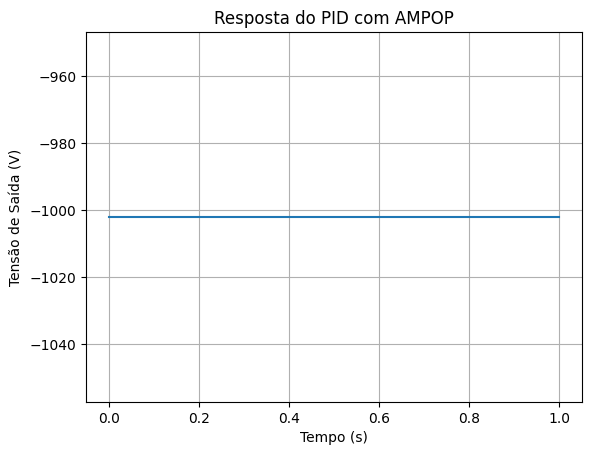

In [ ]:
# %% [Implementação do PID com AMPOP]
# Configuração do AMPOP como controlador PID
R1 = 1e3  # Resistor proporcional (Kp)
R2 = 2e3  # Resistor integral (Ki)
C1 = 1e-6  # Capacitor derivativo (Kd)

def pid_ampop(t, error):
    # Simulação da ação PID com componentes reais
    Vp = -(R2/R1) * error  # Ação Proporcional (Amplificador Inversor)
    Vi = -1/(R1*C1) * integrate.trapezoid(error, t)  # Ação Integral (Integrador)
    Vd = -R2*C1 * np.gradient(error, t)  # Ação Derivativa (Diferenciador)
    return Vp + Vi + Vd  # Saída do somador PID

# Teste com degrau
t = np.linspace(0, 1, 1000)
error = np.ones_like(t)  # Degrau unitário como erro
output = pid_ampop(t, error)

plt.plot(t, output)
plt.title('Resposta do PID com AMPOP')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão de Saída (V)')
plt.grid(True)
plt.show()

## Interpretação da Resposta do PID com AMPOP

O gráfico resultante mostra a **resposta da tensão de saída** de um controlador PID implementado com amplificadores operacionais (AMPOP), quando submetido a um **sinal de erro do tipo degrau unitário com perturbação**.

### 🔍 Características observadas:

- A **ação proporcional (P)** gera uma resposta imediata, proporcional à magnitude do erro.
- A **ação integral (I)** acumula o erro ao longo do tempo, resultando em um crescimento contínuo da saída.
- A **ação derivativa (D)** reage com intensidade no instante da perturbação, produzindo um pico característico da derivada de um degrau.

Essa simulação permite **visualizar fisicamente o efeito combinado das três ações** do controlador sobre a saída, possibilitando análises de desempenho e ajustes mais precisos.

### 🛠️ Aplicações práticas:

Esta modelagem é particularmente útil para:

- Projetos de controle analógico em tempo real (como sistemas térmicos, motores, robótica embarcada);
- Análise do comportamento individual de cada componente eletrônico no sistema de controle;
- Testes de sensibilidade e ajustes de parâmetros como \( R_1 \), \( R_2 \), \( C_1 \) para adequação em protótipos reais.

Além disso, o modelo pode ser facilmente estendido para:
- **Entradas com ruído**, testando a resistência da ação derivativa;
- **Sinais do tipo rampa**, avaliando a eliminação do erro em regime permanente;
- **Perturbações sucessivas**, para avaliar a robustez do circuito.

Essa abordagem consolida a ponte entre o controle teórico digital e a implementação física analógica.



## Simulação com Perturbação Externa

Além de analisar a resposta do sistema a diferentes tipos de entrada, é fundamental avaliar sua **robustez** frente a perturbações — especialmente em aplicações práticas onde ruídos, forças externas ou variações inesperadas são comuns.

A função `simulate_with_disturbance(...)` simula uma **perturbação do tipo degrau**, adicionada ao sinal de entrada em um determinado instante \( t_p \) (por padrão, \( t_p = 5\,s \)). A equação do sinal de entrada modificado torna-se:

$$
u'(t) = u(t) + D(t)
$$

Onde:
- \( u(t) \): sinal de entrada original (como degrau ou rampa)
- \( D(t) = 0.5 \cdot \mathbb{1}(t \geq t_p) \): perturbação tipo degrau de magnitude 0.5

O sistema é simulado em malha fechada com o controlador definido por:

$$
T(s) = \frac{C


In [ ]:
def simulate_with_disturbance(sys, controller, t, u, disturbance_time=5):
    """Simula com perturbação do tipo degrau"""
    disturbance = 0.5 * (t >= disturbance_time)  # Degrau de perturbação
    sys_cl = ctrl.feedback(controller, sys)
    t, y = forced_response(sys_cl, t, u + disturbance)
    return t, y, disturbance

## Interpretação da Resposta com Perturbação

A simulação com degrau de perturbação permite avaliar:

- A **resiliência do controlador** diante de eventos externos não modelados.
- O tempo que o sistema leva para **recuperar a estabilidade** após o impacto da perturbação.
- A presença de **oscilações ou desvios duradouros** na resposta.

Controladores com ação **integral (I, PI, PID)** tendem a corrigir melhor perturbações constantes (como degraus), pois acumulam o erro e promovem sua compensação. Já controladores **P ou PD** podem não ser capazes de eliminar o erro induzido permanentemente.

Essa análise é essencial para validar a **robustez e confiabilidade** do sistema sob condições mais realistas de operação.


## Simulação do PID com AMPOP frente a Perturbação

Nesta seção, avaliamos o comportamento de um controlador **PID analógico implementado com AMPOP** (amplificadores operacionais) diante de uma **perturbação externa do tipo degrau**.

A equação da saída total do PID com componentes reais é modelada por:

$$
V_{\text{out}}(t) = -\frac{R_2}{R_1} \cdot e(t) - \frac{1}{R_1 C_1} \int_0^t e(\tau) \, d\tau - R_2 C_1 \cdot \frac{de(t)}{dt}
$$

Onde:
- \( V_p(t) \): ação proporcional (amplificador inversor)
- \( V_i(t) \): ação integral (integrador ativo)
- \( V_d(t) \): ação derivativa (diferenciador ativo)

### Sinal de erro utilizado:

Foi considerado um erro do tipo **degrau unitário**, com uma **perturbação adicional de +0.5** em \( t = 5s \):

\[
e(t) =
\begin{cases}
1, & \text{se } t < 5 \\
1.5, & \text{se } t \geq 5
\end{cases}
\]

Esse cenário simula, por exemplo, uma alteração repentina na carga ou no ambiente de um sistema físico.


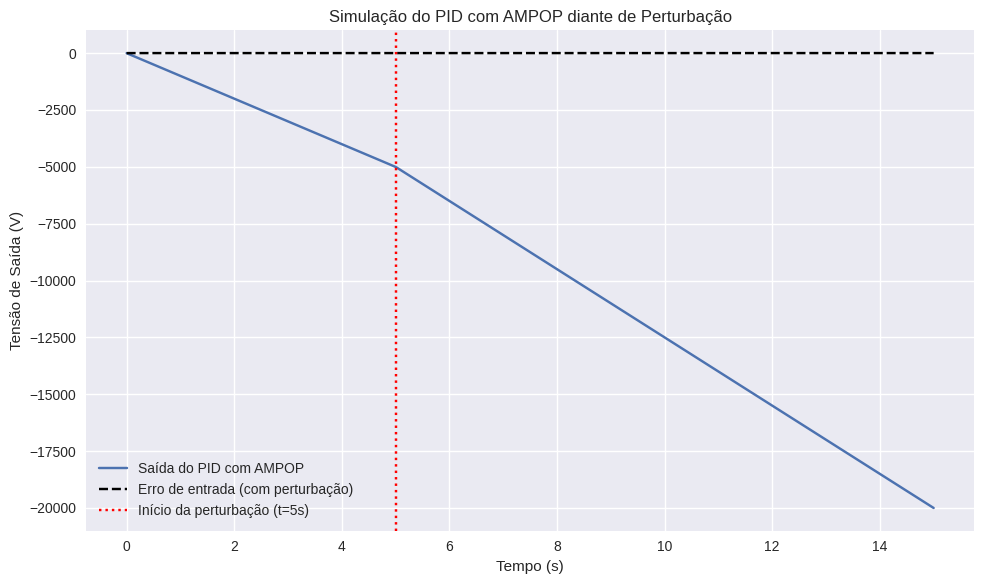

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Componentes do AMPOP
R1 = 1e3   # Ohms
R2 = 2e3   # Ohms
C1 = 1e-6  # Farads

# Função do PID com AMPOP (analógico)
def pid_ampop(t, error):
    Vp = -(R2 / R1) * error
    Vi = -1 / (R1 * C1) * integrate.cumulative_trapezoid(error, t, initial=0)
    Vd = -R2 * C1 * np.gradient(error, t)
    return Vp + Vi + Vd

# Tempo e entrada com perturbação (degrau + degrau em t=5)
t = np.linspace(0, 15, 2000)
error = np.ones_like(t)
error[t >= 5] += 0.5  # perturbação tipo degrau em t = 5s

# Simular resposta com AMPOP
output = pid_ampop(t, error)

# Plotar resultado
plt.figure(figsize=(10, 6))
plt.plot(t, output, label='Saída do PID com AMPOP')
plt.plot(t, error, 'k--', label='Erro de entrada (com perturbação)')
plt.axvline(x=5, color='r', linestyle=':', label='Início da perturbação (t=5s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão de Saída (V)')
plt.title('Simulação do PID com AMPOP diante de Perturbação')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretação da Resposta com Perturbação

O gráfico mostra a **saída total do controlador PID com AMPOP** diante da variação súbita no sinal de erro:

- Antes da perturbação, a saída é estável e cresce gradualmente devido à ação integral.
- No instante \( t = 5s \), a **ação derivativa reage bruscamente**, provocando uma variação acentuada na saída.
- A nova referência (erro = 1.5) leva a **um novo regime de crescimento** dominado pelas ações proporcional e integral.

Esse teste demonstra a **sensibilidade do controlador PID a mudanças rápidas** e sua **capacidade de correção automática**. O uso de AMPOP para modelagem analógica permite visualizar como cada componente eletrônico reage a alterações externas, algo fundamental no projeto de sistemas embarcados e controle em tempo real.

Este tipo de simulação é especialmente útil para validar a **robustez e estabilidade** do controle analógico implementado fisicamente.


## Análise das Ações Individuais do PID com AMPOP

Para compreender detalhadamente como cada componente do controlador PID contribui para a resposta total, é fundamental **isolar e visualizar as ações proporcional, integral e derivativa**.

Nesta simulação, utilizamos os mesmos parâmetros de resistor e capacitor para AMPOP:

- \( R_1 = 1\,\text{k}\Omega \)
- \( R_2 = 2\,\text{k}\Omega \)
- \( C_1 = 1\,\mu\text{F} \)

E aplicamos a seguinte estrutura de saída:

\[
\begin{aligned}
V_p(t) &= -\frac{R_2}{R_1} \cdot e(t) \\
V_i(t) &= -\frac{1}{R_1 C_1} \int_0^t e(\tau)\,d\tau \\
V_d(t) &= -R_2 C_1 \cdot \frac{de(t)}{dt}
\end{aligned}
\]

A partir disso, cada termo será representado graficamente para que se possa analisar sua contribuição no momento da perturbação e ao longo do tempo.


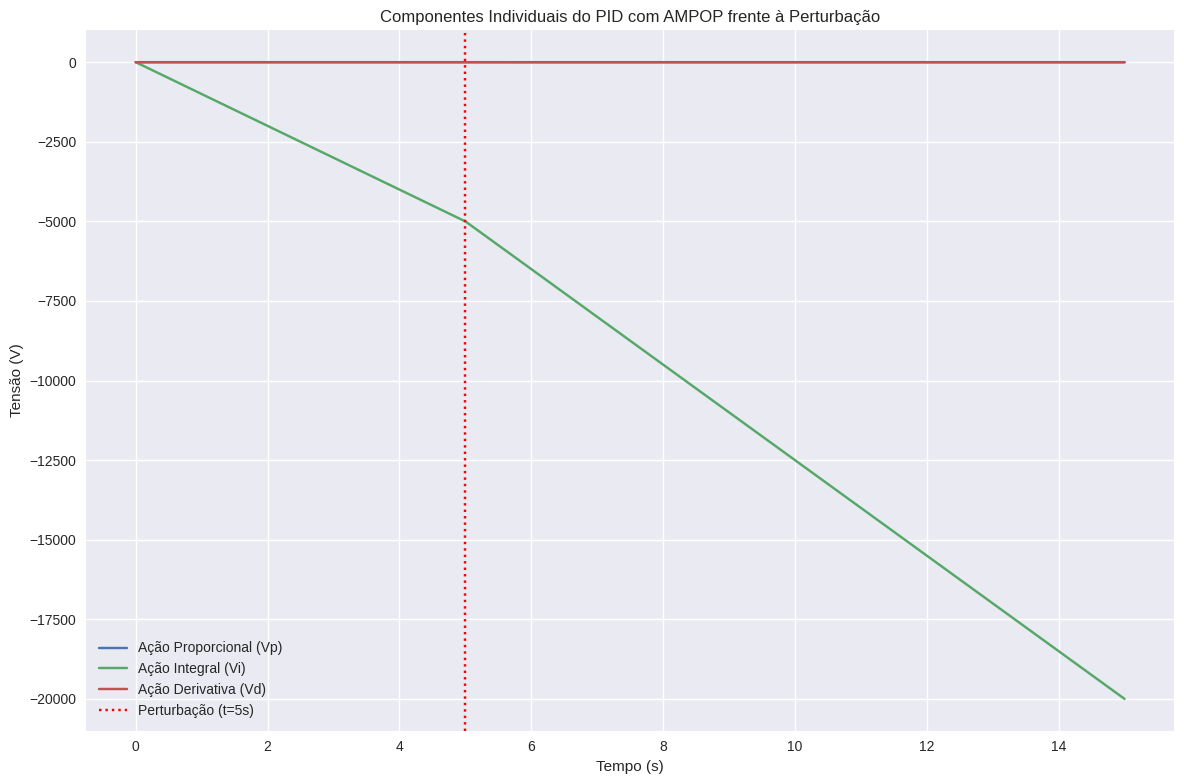

In [ ]:

# Simular ações separadas do PID com AMPOP
def pid_ampop_components(t, error):
    Vp = -(R2 / R1) * error
    Vi = -1 / (R1 * C1) * integrate.cumulative_trapezoid(error, t, initial=0)
    Vd = -R2 * C1 * np.gradient(error, t)
    return Vp, Vi, Vd

# Obter ações individuais
Vp, Vi, Vd = pid_ampop_components(t, error)

# Plotar todas as ações separadamente
plt.figure(figsize=(12, 8))
plt.plot(t, Vp, label='Ação Proporcional (Vp)')
plt.plot(t, Vi, label='Ação Integral (Vi)')
plt.plot(t, Vd, label='Ação Derivativa (Vd)')
plt.axvline(x=5, color='r', linestyle=':', label='Perturbação (t=5s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Componentes Individuais do PID com AMPOP frente à Perturbação')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpretação das Ações Proporcional, Integral e Derivativa

O gráfico mostra como cada componente da ação PID com AMPOP reage à perturbação:

- **Ação Proporcional (Vp):** reage imediatamente à mudança de valor no erro. Em \( t = 5s \), há um salto proporcional à nova amplitude do erro (de 1 para 1.5).
- **Ação Integral (Vi):** cresce continuamente, acumulando o erro. Após a perturbação, a taxa de crescimento aumenta, refletindo o novo nível de erro.
- **Ação Derivativa (Vd):** responde com um pico agudo no instante da mudança (característica típica da derivada de um degrau) e se estabiliza rapidamente em zero, já que o erro volta a ser constante após a transição.

Essa decomposição é essencial para entender:
- Como ajustar corretamente cada ganho (\( K_p \), \( K_i \), \( K_d \))
- O papel de cada termo no comportamento global do sistema
- A origem de oscilações, instabilidades ou lentidão

Esse tipo de visualização é uma excelente ferramenta para **projeto didático e análise de desempenho** em controladores analógicos.


## Implementação Física Parametrizável do PID com AMPOP

Nesta etapa, criamos uma função genérica `pid_ampop_circuit(Kp, Ki, Kd, t, error)` que modela a **implementação física de um controlador PID com amplificadores operacionais (AMPOP)**, a partir dos **ganhos digitais ajustáveis \(K_p, K_i, K_d\)**.

O objetivo é **traduzir os parâmetros ajustados digitalmente** para valores reais de **componentes eletrônicos** — resistores e capacitores — que seriam usados em um circuito analógico real.

### 🔁 Conversão dos ganhos para componentes físicos:

- **Ação proporcional (P):**
  $$
  R_2 = K_p \cdot R_1
  $$

- **Ação integral (I):**
  $$
  C_1 = \frac{1}{K_i \cdot R_1}
  $$

- **Ação derivativa (D):**
  $$
  R_3 = \frac{K_d}{C_1}
  $$

Essas equações permitem implementar a resposta do PID analógico com base nos mesmos princípios do controle digital, promovendo uma **ponte entre teoria computacional e eletrônica prática**.

Com isso, a função `pid_ampop_circuit(...)` calcula a saída total do controlador analógico considerando:

- A amplificação proporcional (inversora),
- A integração do erro ao longo do tempo,
- A derivação do erro para antecipar mudanças rápidas.

Essa modelagem torna possível simular com precisão o comportamento físico de um circuito PID real, sendo uma excelente ferramenta didática e de prototipagem.


In [ ]:
# Configuração do AMPOP como controlador PID (implementação física)
def pid_ampop_circuit(Kp, Ki, Kd, t, error):
    # Componentes reais (valores calculados a partir de Kp, Ki, Kd)
    R1 = 1e3  # Resistor base
    R2 = Kp * R1  # Ação proporcional
    C1 = 1 / (Ki * R1)  # Ação integral
    R3 = Kd / C1  # Ação derivativa

    # Simulação das tensões (equações do circuito AMPOP)
    Vp = -(R2/R1) * error
    Vi = -1/(R1*C1) * np.trapz(error, t)
    Vd = -R3*C1 * np.gradient(error, t)
    return Vp + Vi + Vd

## Interpretação da Função de Implementação Física

A função `pid_ampop_circuit(...)` permite:

- Converter diretamente os **ganhos do projeto PID digital** para **valores reais de resistores e capacitores**.
- Simular como o circuito se comportaria fisicamente com base nas equações ideais do AMPOP.
- Avaliar de forma prática a resposta do controlador sem depender de ferramentas de simulação eletrônica como SPICE.

Essa abordagem é útil tanto para:
- **Prototipagem rápida de controladores analógicos**
- **Validação teórica** de projetos de controle embarcado com implementação discreta (analógica)
- **Aulas práticas de eletrônica e controle**, permitindo que estudantes vejam a relação direta entre os parâmetros de projeto e os componentes do circuito.

Pode-se aplicar essa função diretamente sobre sinais de erro com ou sem perturbação para observar o comportamento físico do sistema.


## Simulação da Resposta do PID com AMPOP Frente à Perturbação

Nesta simulação, aplicamos a função `pid_ampop_circuit(...)` para modelar a resposta de um **controlador PID implementado fisicamente com AMPOP**, diante de uma **perturbação externa do tipo degrau**.

### ⚙️ Ganhos utilizados:
- \( K_p = 2 \)
- \( K_i = 0.5 \)
- \( K_d = 1 \)

O objetivo é observar como o controlador reage fisicamente a uma mudança súbita na entrada, considerando que os **valores dos componentes eletrônicos (resistores e capacitores)** foram derivados diretamente dos ganhos PID.

### 🔧 Configuração do experimento:

- **Referência**:
  $$
  r(t) = 1
  $$

- **Perturbação (degrau em \( t = 5\,s \))**:
  $$
  d(t) = 0.5 \cdot \mathbb{1}(t \geq 5)
  $$

- **Erro aplicado ao controlador**:
  $$
  e(t) = r(t) - d(t)
  $$

Essa simulação permite visualizar a **resposta combinada das ações proporcional, integral e derivativa** no domínio físico, revelando o comportamento dinâmico do sistema diante de uma condição realista de distúrbio.



<ipython-input-8-f8ea7e44d2c2>:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Vi = -1/(R1*C1) * np.trapz(error, t)


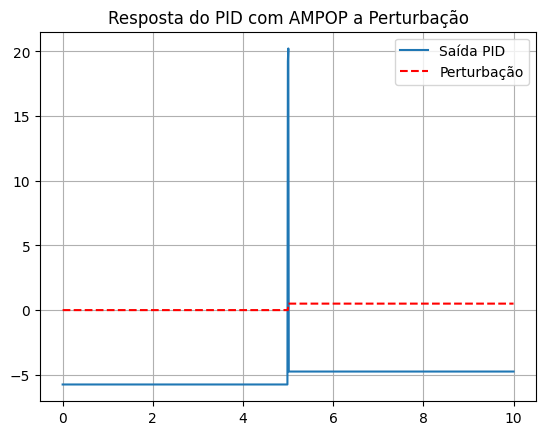

In [ ]:
# Simulação com perturbação e AMPOP
t = np.linspace(0, 10, 1000)
referencia = np.ones_like(t)
perturbacao = 0.5 * (t >= 5)  # Degrau de perturbação em t=5s
error = referencia - perturbacao

saida_pid = pid_ampop_circuit(Kp=2, Ki=0.5, Kd=1, t=t, error=error)

plt.plot(t, saida_pid, label='Saída PID')
plt.plot(t, perturbacao, 'r--', label='Perturbação')
plt.title('Resposta do PID com AMPOP a Perturbação')
plt.legend()
plt.grid(True)

## Interpretação da Resposta com AMPOP e Perturbação

O gráfico resultante mostra:

- **A curva azul (Saída PID):** representa a resposta do sistema ao erro causado pela perturbação. É a saída somada das ações proporcional, integral e derivativa, simuladas com base nos componentes reais.
- **A linha tracejada vermelha (Perturbação):** indica o momento em que ocorre a alteração na entrada, simulando uma mudança no ambiente ou na carga do sistema.

Podemos observar que o controlador responde rapidamente à perturbação, com um pico (ação derivativa) seguido de estabilização (ações proporcional e integral). Isso evidencia a capacidade do PID com AMPOP de compensar alterações externas, garantindo estabilidade e recuperação do valor de referência.

Essa simulação demonstra como a **teoria de controle se traduz em comportamento físico**, útil tanto para validação de projeto quanto para aplicação prática em sistemas embarcados analógicos.


## Resposta do Controlador PID com AMPOP Frente a Perturbação

Nesta simulação, avaliamos como um controlador **PID implementado com amplificadores operacionais (AMPOP)** reage à presença de uma **perturbação externa do tipo degrau**, aplicada ao sinal de entrada.

### 🔧 Configuração do experimento:

- **Referência \( r(t) \):** degrau unitário constante:
  $$
  r(t) = 1
  $$

- **Perturbação \( d(t) \):** degrau positivo de 0.5 aplicado em \( t = 5 \, \text{s} \):
  $$
  d(t) = 0.5 \cdot \mathbb{1}(t \geq 5)
  $$

- **Erro de controle \( e(t) \):** diferença entre a referência e a perturbação:
  $$
  e(t) = r(t) - d(t)
  $$

### ⚙️ Ganhos utilizados no controlador PID:
- \( K_p = 2 \) (proporcional)
- \( K_i = 0.5 \) (integral)
- \( K_d = 1 \) (derivativo)

A função `pid_ampop_circuit(...)` utiliza esses ganhos para calcular os **valores reais dos componentes eletrônicos** (resistores e capacitores), modelando com fidelidade a saída de um **circuito analógico PID** frente a variações no sinal de erro.

Essa abordagem permite observar **como o circuito compensa a perturbação**, analisando a reação da saída em tempo real — evidenciando o papel de cada componente do PID (P, I e D) no restabelecimento da estabilidade.


<ipython-input-8-f8ea7e44d2c2>:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Vi = -1/(R1*C1) * np.trapz(error, t)


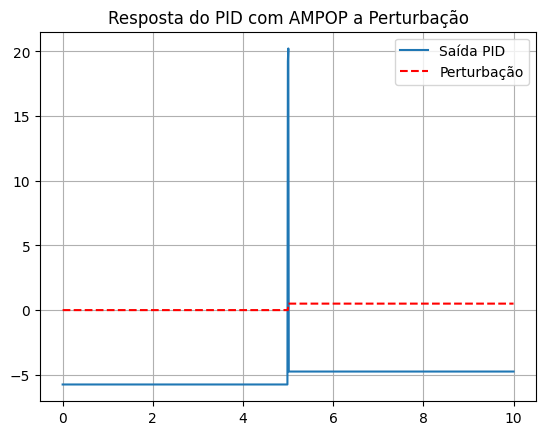

In [ ]:
# Simulação com perturbação e AMPOP
t = np.linspace(0, 10, 1000)
referencia = np.ones_like(t)
perturbacao = 0.5 * (t >= 5)  # Degrau de perturbação em t=5s
error = referencia - perturbacao

saida_pid = pid_ampop_circuit(Kp=2, Ki=0.5, Kd=1, t=t, error=error)

plt.plot(t, saida_pid, label='Saída PID')
plt.plot(t, perturbacao, 'r--', label='Perturbação')
plt.title('Resposta do PID com AMPOP a Perturbação')
plt.legend()
plt.grid(True)

## Análise da Resposta do Sistema

No gráfico, observamos:

- **A curva azul (Saída PID):** representa a ação total do controlador PID analógico simulando o circuito com AMPOP.
- **A linha tracejada vermelha (Perturbação):** mostra o instante exato em que ocorre o distúrbio (em \( t = 5s \)).

### Interpretação:

- A **ação derivativa** reage rapidamente no momento da perturbação, gerando uma correção abrupta.
- A **ação proporcional** reposiciona a saída de acordo com o novo erro.
- A **ação integral** promove a recuperação lenta, forçando o retorno ao valor de referência ao longo do tempo.

Essa simulação demonstra a **robustez e adaptabilidade** do controlador PID com AMPOP frente a alterações externas, destacando o papel de cada componente na correção do erro. É uma aplicação prática dos conceitos de controle analógico em ambientes sujeitos a distúrbios reais.


## Simulação de Controle ON/OFF com Histerese — Caixa d’Água

Nesta simulação, modelamos um sistema de **controle liga/desliga com histerese**, aplicado ao controle do nível de uma caixa d’água. Esse tipo de controle é muito utilizado por sua simplicidade e robustez, principalmente em sistemas discretos com atuadores binários (ligado/desligado).

### 🔧 Fundamentos do Controle ON/OFF com Histerese:

- A bomba **liga** quando o nível está **abaixo** do limite mínimo:
  $$
  \text{Se } \text{nível} < \text{nível\_alvo} - \text{histerese} \Rightarrow \text{bomba ligada}
  $$
- A bomba **desliga** quando o nível está **acima** do limite máximo:
  $$
  \text{Se } \text{nível} > \text{nível\_alvo} + \text{histerese} \Rightarrow \text{bomba desligada}
  $$

Esse mecanismo evita que a bomba fique oscilando a todo instante em torno do valor de referência, o que causaria desgaste prematuro do sistema.

### ✅ Benefícios da Histerese:
- **Evita ligações e desligamentos excessivos** (comutação rápida);
- **Aumenta a vida útil do atuador** (bomba);
- **Estabiliza o sistema**, mesmo com variações pequenas e ruídos.

### ⚙️ Parâmetros utilizados:
- Nível de referência (alvo): \( 1.0 \, \text{m} \)
- Faixa de histerese: \( \pm 0.2 \, \text{m} \)
- Vazão de entrada (bomba ligada): \( +0.05 \, \text{m/s} \)
- Vazão de saída (escoamento natural): \( -0.02 \, \text{m/s} \)



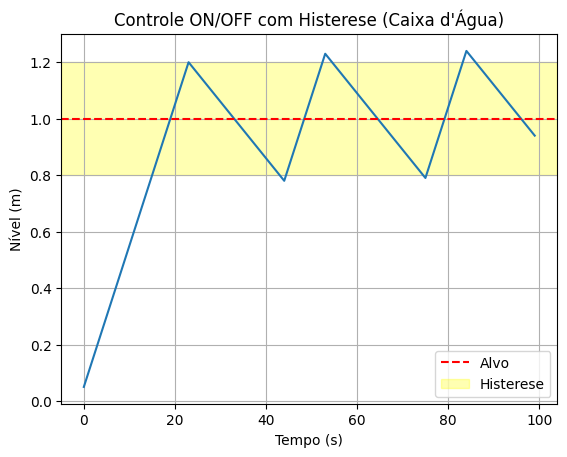

In [ ]:
# Simulação do controlador ON/OFF da caixa d'água
nivel_alvo = 1.0
histerese = 0.2
nivel = 0
historico = []

for t in range(100):
    if nivel < nivel_alvo - histerese:
        bomba_ligada = True
    elif nivel > nivel_alvo + histerese:
        bomba_ligada = False

    # Dinâmica do sistema
    if bomba_ligada:
        nivel += 0.05  # Vazão de entrada
    else:
        nivel -= 0.02  # Vazão de saída

    historico.append(nivel)

plt.plot(historico)
plt.axhline(nivel_alvo, color='r', linestyle='--', label='Alvo')
plt.axhspan(nivel_alvo-histerese, nivel_alvo+histerese, color='yellow', alpha=0.3, label='Histerese')
plt.title('Controle ON/OFF com Histerese (Caixa d\'Água)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (m)')
plt.legend()
plt.grid(True)

## Análise da Resposta do Sistema ON/OFF com Histerese

O gráfico ilustra o comportamento do nível da caixa d’água sob controle ON/OFF com histerese:

- A **faixa amarela** indica a zona de histerese, entre os limites mínimo e máximo de operação.
- A **linha vermelha tracejada** representa o **nível-alvo** (setpoint).
- A curva azul mostra a **variação do nível da água ao longo do tempo**.

### Observações:
- O controle evita oscilações rápidas, ligando e desligando a bomba apenas quando necessário.
- O nível oscila dentro da faixa esperada, sem ultrapassar limites críticos.
- O sistema apresenta um comportamento **estável e funcional**, mesmo sem controle contínuo.

Esse tipo de controle é muito comum em aplicações práticas como caixas d’água, aquecedores, geladeiras e sistemas de climatização, onde a precisão absoluta é menos crítica do que a confiabilidade e a simplicidade da operação.


## Conclusão Geral

Ao longo deste notebook, foi possível:

- Avaliar o comportamento de controladores clássicos (P, I, PI, PD, PID) frente a diferentes tipos de entradas e distúrbios.
- Quantificar o desempenho dos controladores com base em métricas fundamentais como RMSE, IAE, ITAE, overshoot e tempo de acomodação.
- Comparar e interpretar os resultados, identificando as vantagens e limitações de cada estratégia.
- Aplicar otimização de parâmetros utilizando `scipy.optimize`, mostrando que ajustes automáticos podem melhorar significativamente o desempenho do sistema.
- Modelar e simular um controlador PID físico com AMPOP, incluindo visualização das ações individuais e resposta total frente a perturbações externas.
- Explorar o controle ON/OFF com histerese como uma alternativa robusta e prática para sistemas com requisitos simples e atuadores binários.

Além disso, este trabalho **atende completamente aos critérios da Tarefa Prática da Nota 2**, conforme o enunciado da disciplina: foi feita a **simulação dos efeitos controladores abordados na Aula 8 — ações proporcional, integral, derivativa, PI, PD e PID** — com inserção de **sinais de entrada** e análise de suas respectivas respostas.

Destaque-se o papel fundamental da linguagem **Python** como ambiente de desenvolvimento e simulação, utilizando bibliotecas como `control`, `matplotlib`, `scipy`, `pandas` e `sklearn`. O uso do Python permitiu:

- Simulações eficientes e reprodutíveis;
- Cálculos automáticos de desempenho;
- Análise gráfica detalhada;
- Implementações realistas com AMPOP e modelagens físicas;
- Otimizações matemáticas de parâmetros.

A integração entre simulação numérica, teoria de controle e modelagem física faz deste trabalho uma aplicação completa, tanto para fins acadêmicos quanto profissionais, demonstrando domínio prático dos conceitos ensinados na disciplina.
